In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

## Matrix Profile

In [296]:
#!pip install matrixprofile-ts

In [297]:
from matrixprofile import *

Le time series sulle quali andiamo a lavorare sono le seguenti:

- Centroid 0: Nearest Time Series Index = 455
- Centroid 1: Nearest Time Series Index = 341
- Centroid 2: Nearest Time Series Index = 787
- Centroid 3: Nearest Time Series Index = 527
- Centroid 4: Nearest Time Series Index = 989
- Centroid 5: Nearest Time Series Index = 561
- Centroid 6: Nearest Time Series Index = 811
- Centroid 7: Nearest Time Series Index = 785

Lavoro sull'approssimazione SAX, knn con distanze DTW.
Gli indici delle TS che prendo sono quelle che sono più vicine ai centroidi dei cluster più numerosi, ovvero CLUSTER 0 (432 ts), CLUSTER 3 (290 ts) e CLUSTER 6 (748 ts).
Le TS più vicine sono quindi: 
- 0-> 455
- 3->527 
- 6->811

Credo che l'indice della ts con approssimazione SAX sia lo stesso indice delle TS originali, le prendo da quello smoothed, cioè con il noise tolto o almeno ridotto, per avere dei pattern più significativi

In [298]:
# carico le time series prendendo smooted and scaled
x_train_smooth=np.load('RavdessAudioOnlyNumpy__X_train_smoothed_scaled.npy')

In [299]:
x_train_smooth.shape

(1828, 92672, 1)

In [300]:
x_train_smooth=np.squeeze(x_train_smooth) #serve per farlo tornare bidimensionale
x_train_smooth.shape

(1828, 92672)

In [301]:
#faccio un check che ho comunque le 1828 TS anche con l'approssimazione, ma ne sono piuttosto sicura: - yes
x_train_sax=np.load('X_train_sax.npy')
x_train_sax=np.squeeze(x_train_sax)
x_train_sax.shape

(1828, 500)

## Scelgo ora la diversa TS che voglio analizzare tra le 3 diverse che abbiamo preselezionato

### Cluster 0, TS 455

nan sono i valori che sono stati aggiunti alla ts per arrivare alla lunghezza max scelta per lo scaling

array([0.00248249, 0.00320418, 0.00382095, ...,        nan,        nan,
              nan])

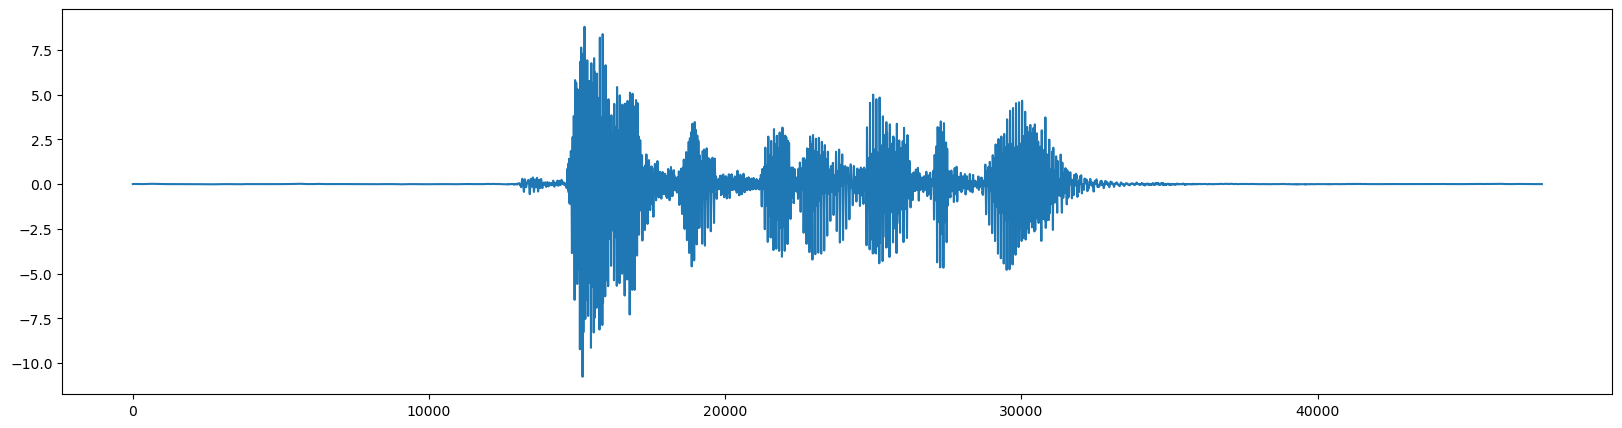

In [302]:
#prendo i valori per la ts 455
tsX=x_train_smooth[455] 
tsX.shape

plt.figure(figsize=(20,5))
plt.plot(tsX)
plt.show
tsX

### Cluster 3, TS 527

array([-0.00142836, -0.00954653, -0.01797988, ...,         nan,
               nan,         nan])

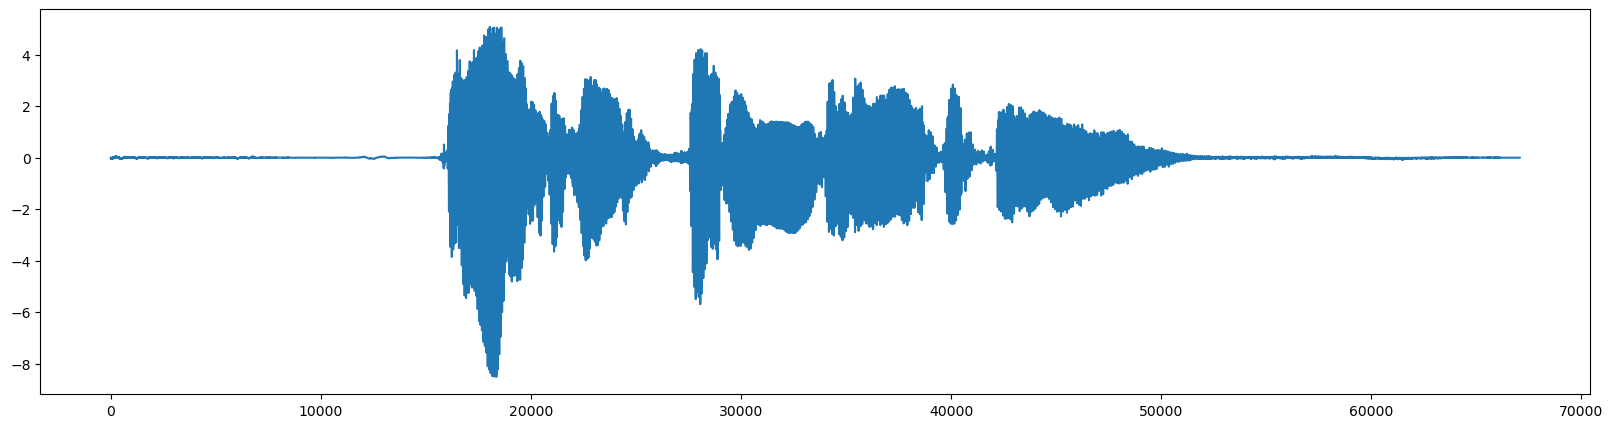

In [303]:
#prendo i valori per la ts 527
tsX=x_train_smooth[527] 

plt.figure(figsize=(20,5))
plt.plot(tsX)
plt.show
tsX

### Cluster 6, TS 811

array([0.00514907, 0.00629462, 0.00745598, ...,        nan,        nan,
              nan])

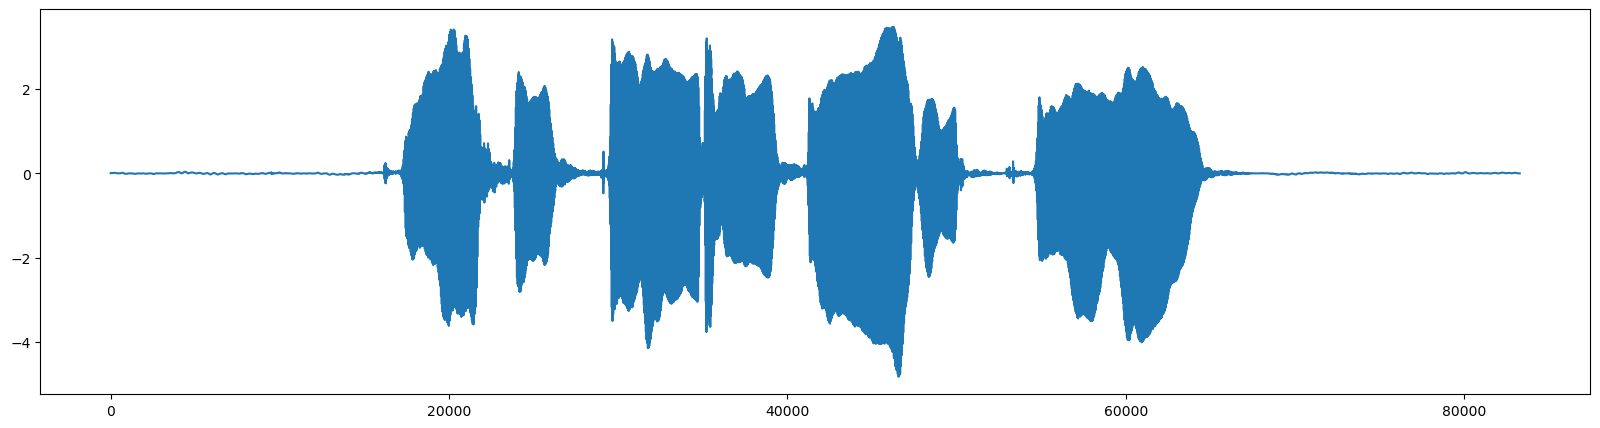

In [304]:
#prendo i valori per la ts 811
tsX=x_train_smooth[811] 

plt.figure(figsize=(20,5))
plt.plot(tsX)
plt.show
tsX

Considero solamente il range 15000-65000 perchè altri valori non sembrano essere interessanti (da una prima analisi visiva)


array([-0.00673676, -0.00692642, -0.00708927, ...,  0.022466  ,
        0.00335581, -0.01370584])

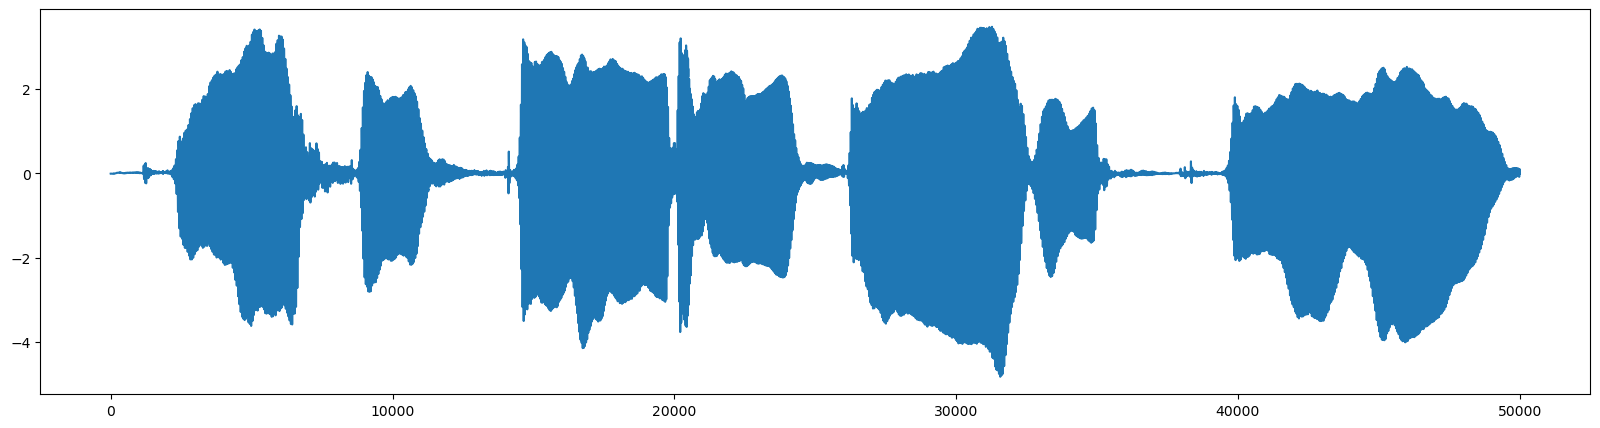

In [305]:
tsX=x_train_smooth[811, 15000:65000] 

plt.figure(figsize=(20,5))
plt.plot(tsX)
plt.show
tsX

### Inizio a fare delle prove considerando diverse size per le finestre (w): 

In [306]:
# trasformo serie da numpy array a Series (formato come quello di Guidotti per semplificare i grafici)
tsX = pd.Series(tsX)
tsX

0       -0.006737
1       -0.006926
2       -0.007089
3       -0.007286
4       -0.006877
           ...   
49995    0.059527
49996    0.041867
49997    0.022466
49998    0.003356
49999   -0.013706
Length: 50000, dtype: float64

### W-PICCOLISSIME DIMENSIONI=10, 25,50, 75

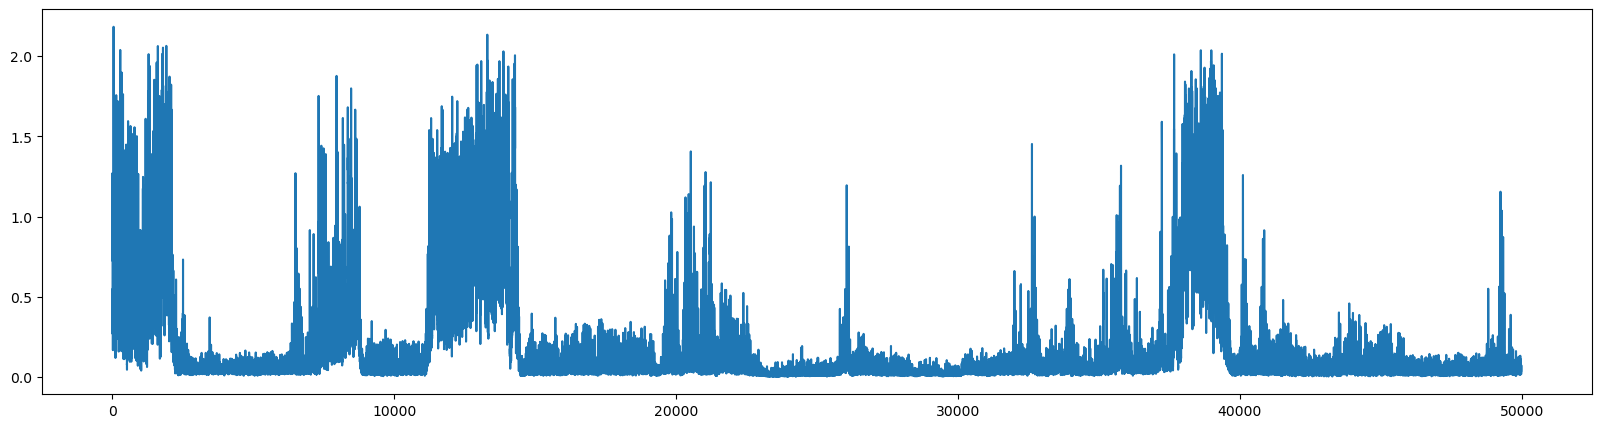

([[23941, 23980],
  [24251, 25354],
  [23329, 23405],
  [23594, 23632],
  [23518, 23670],
  [43147, 43283],
  [29440, 29486],
  [23423, 23461],
  [23370, 23446],
  [23543, 23581, 23619]],
 [0.0012714196914773684,
  0.002232858925009681,
  0.0024913589746480267,
  0.0027048047996002193,
  0.0029001181155167226,
  0.002950422707371863,
  0.002968854187943391,
  0.003029274430419371,
  0.003205208755924561,
  0.0032622707183396385])

In [308]:
w = 10
mp, mpi = matrixProfile.stomp(tsX.values, w)

plt.figure(figsize=(20,5))
plt.plot(mp)
plt.show()
tsX

mo, mod  = motifs.motifs(tsX.values, (mp, mpi), max_motifs=10)
mo,mod

# ho sull'asse delle X solamente 50000 valori perchè ho ristretto la finestra

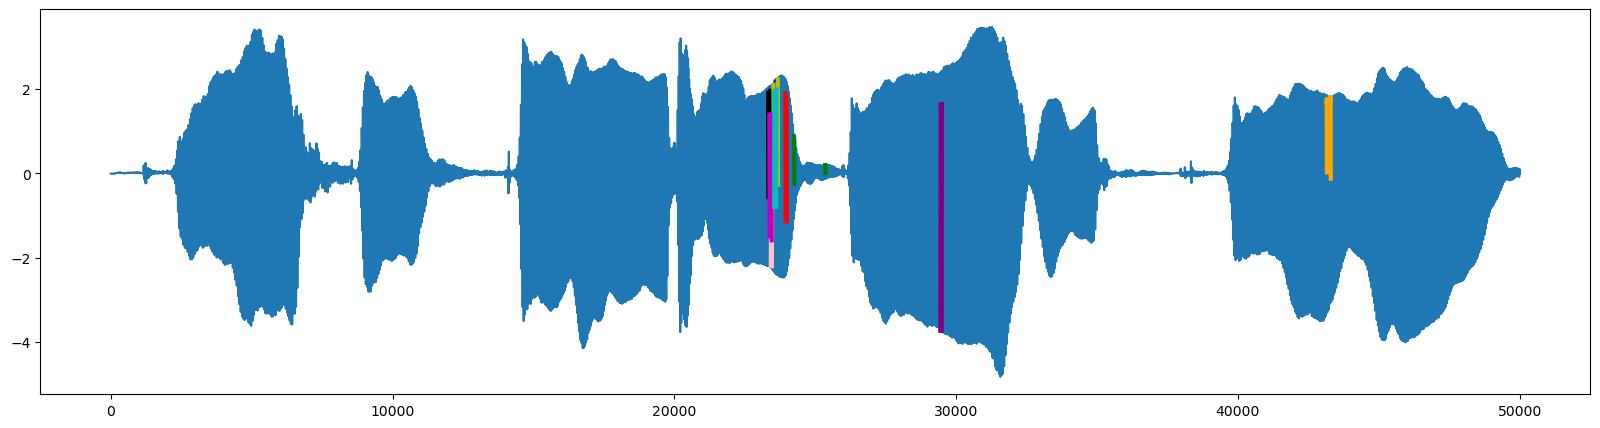

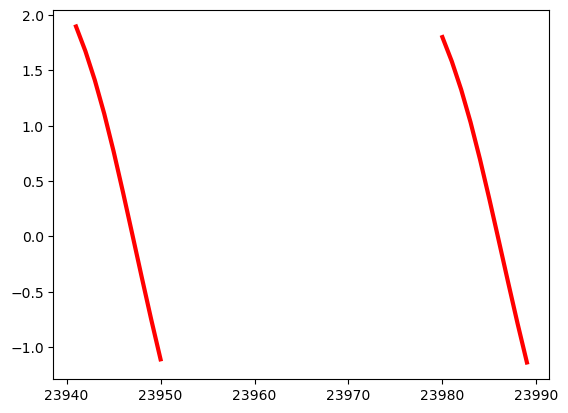

<Figure size 2000x500 with 0 Axes>

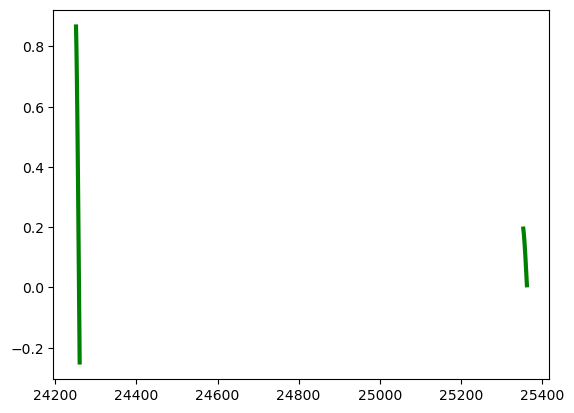

<Figure size 2000x500 with 0 Axes>

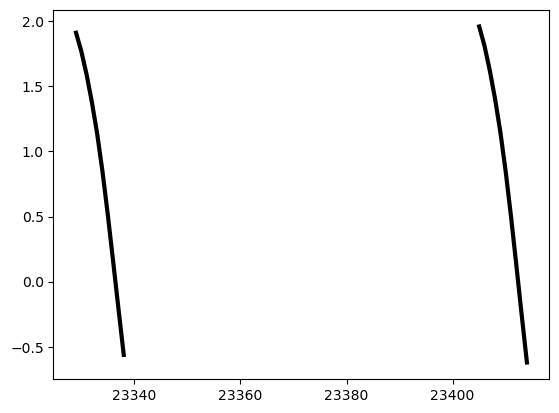

<Figure size 2000x500 with 0 Axes>

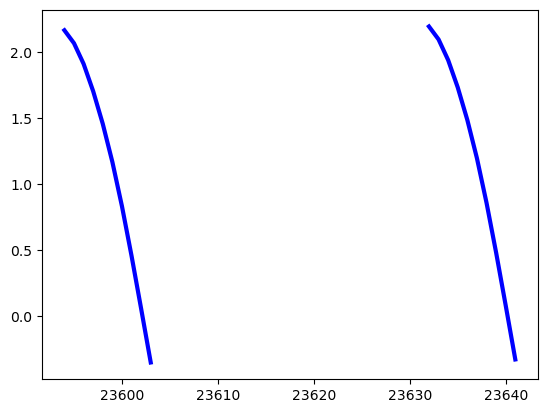

<Figure size 2000x500 with 0 Axes>

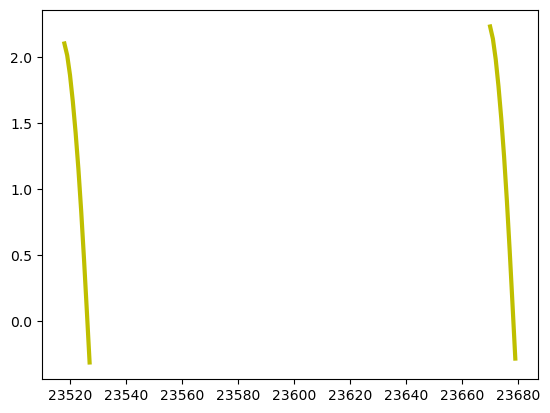

<Figure size 2000x500 with 0 Axes>

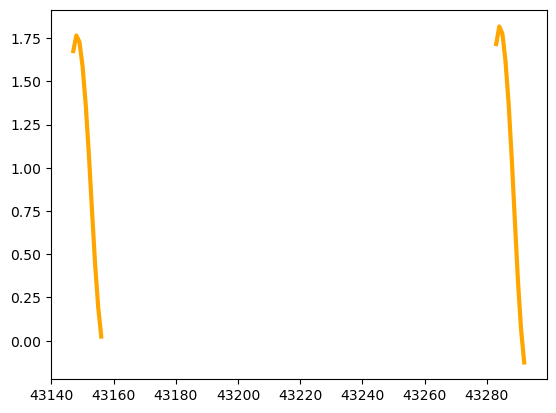

<Figure size 2000x500 with 0 Axes>

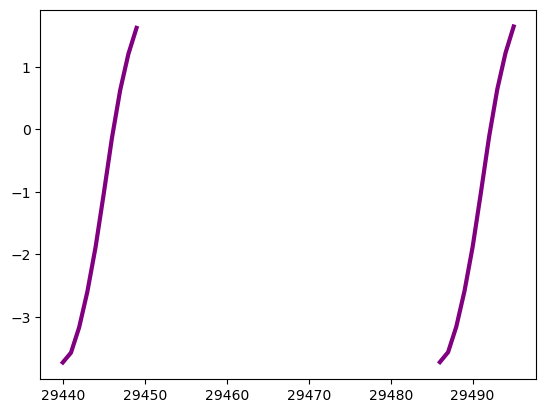

<Figure size 2000x500 with 0 Axes>

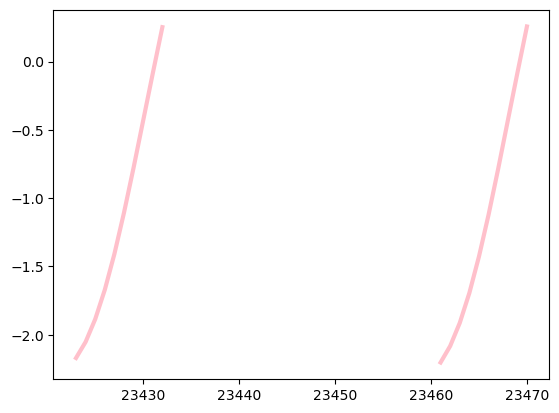

<Figure size 2000x500 with 0 Axes>

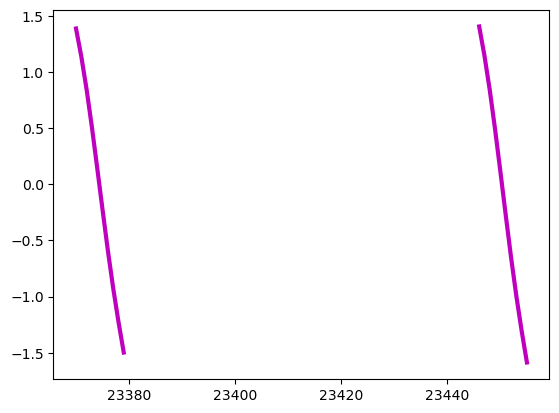

<Figure size 2000x500 with 0 Axes>

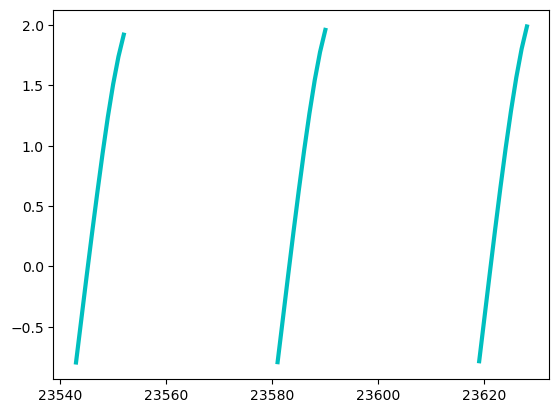

<Figure size 2000x500 with 0 Axes>

In [309]:
plt.figure(figsize=(20,5))
plt.plot(tsX.values)
colors = ['r', 'g', 'k', 'b', 'y', 'orange', 'purple', 'pink', 'm', 'c'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.figure(figsize=(20,5))
    plt.show()

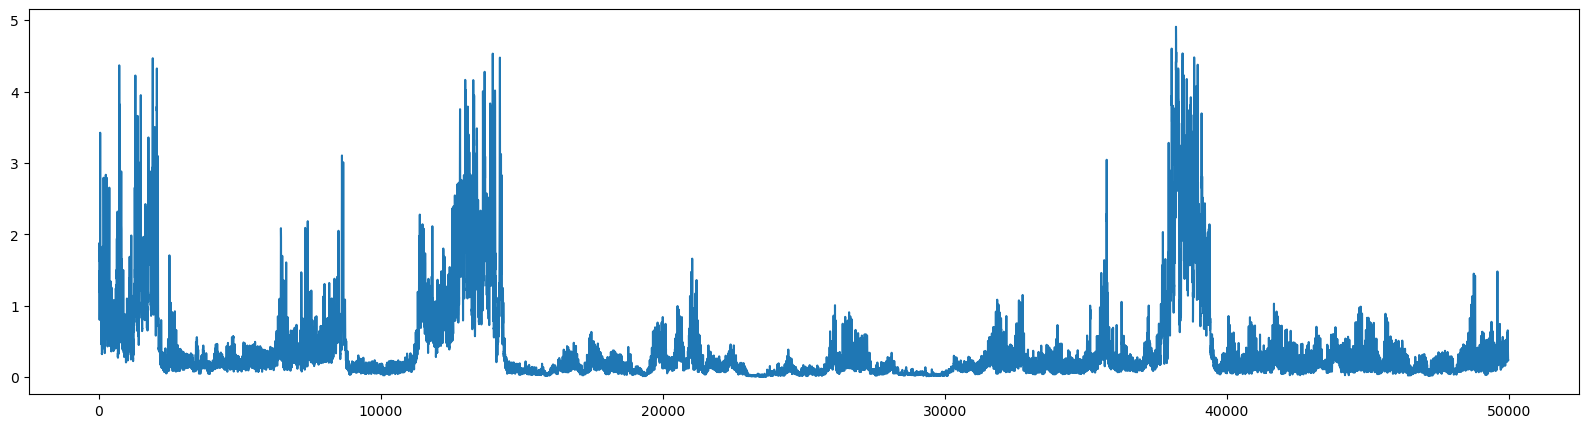

([[23555, 23631],
  [23568, 23644],
  [23421, 23459, 23497, 23535],
  [23396, 23434, 23662],
  [23196, 23234, 23272]],
 [0.00634288226032162,
  0.008150246968448327,
  0.00945937165436405,
  0.009789069563424617,
  0.01063575398758766])

In [ ]:
w = 25
mp, mpi = matrixProfile.stomp(tsX.values, w)

plt.figure(figsize=(20,5))
plt.plot(mp)
plt.show()
tsX

mo, mod  = motifs.motifs(tsX.values, (mp, mpi), max_motifs=5)
mo,mod

# ho sull'asse delle X solamente 50000 valori perchè ho ristretto la finestra

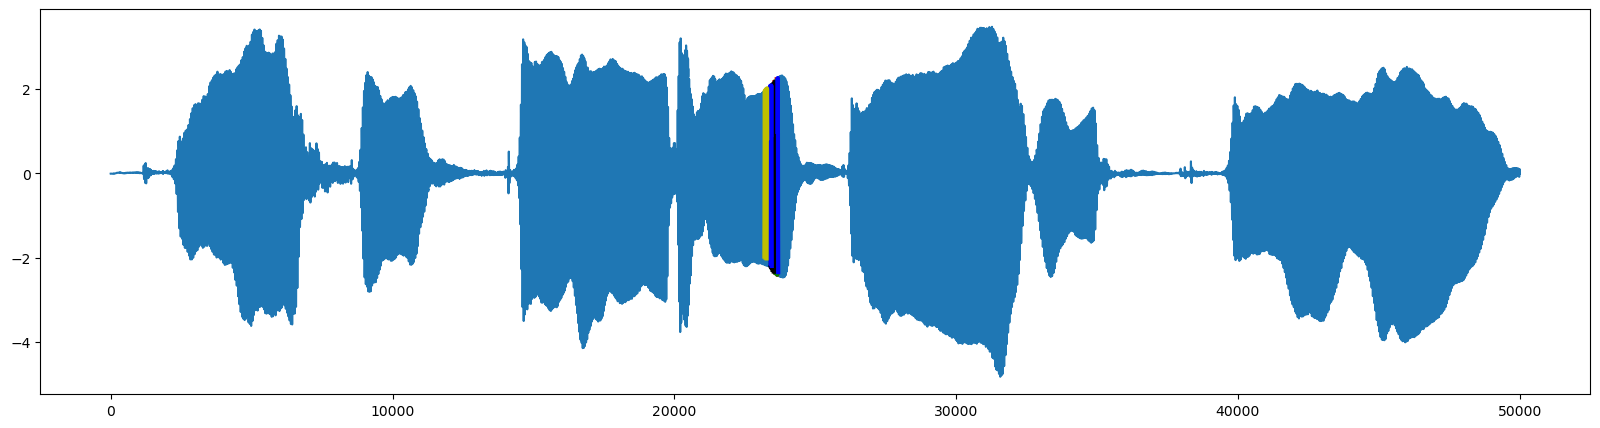

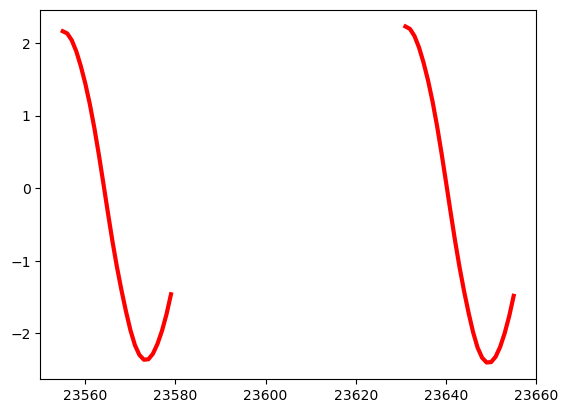

<Figure size 2000x500 with 0 Axes>

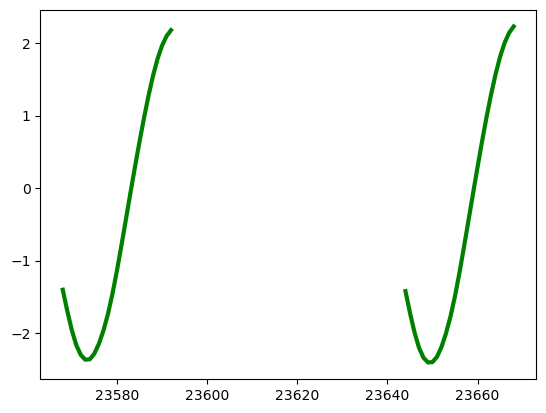

<Figure size 2000x500 with 0 Axes>

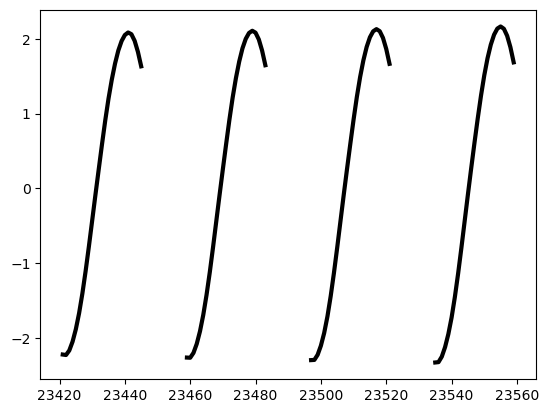

<Figure size 2000x500 with 0 Axes>

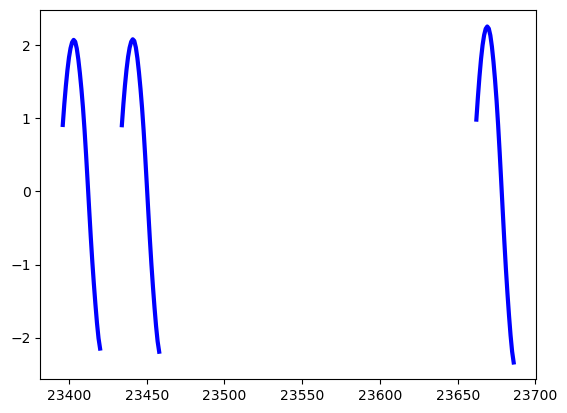

<Figure size 2000x500 with 0 Axes>

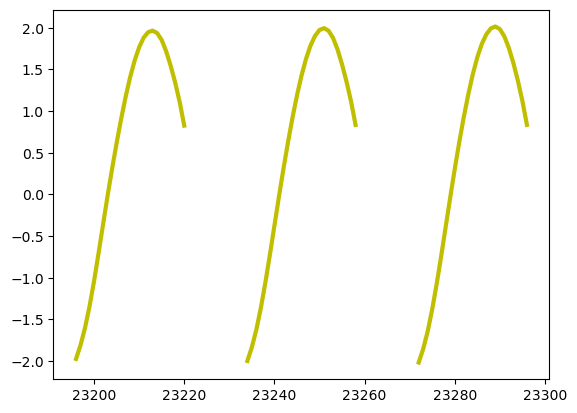

<Figure size 2000x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(tsX.values)
colors = ['r', 'g', 'k', 'b', 'y', 'orange', 'purple', 'pink', 'm', 'c'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.figure(figsize=(20,5))
    plt.show()

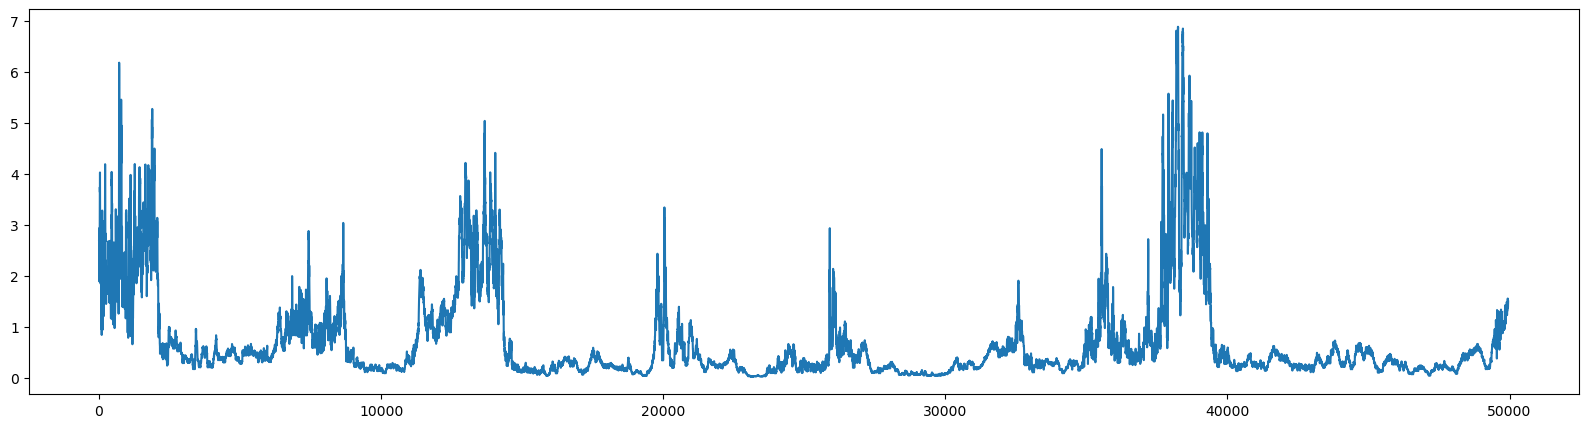

([[23078, 23116, 23154],
  [23439, 23477, 23515],
  [23206, 23244],
  [23301, 23339],
  [23375, 23413],
  [23575, 23613],
  [22996, 23034]],
 [0.025443716893079466,
  0.02909662647686089,
  0.0296945648934814,
  0.031713565635541396,
  0.03576086692666943,
  0.03579541841331362,
  0.0365373377886305])

In [ ]:
w = 50
mp, mpi = matrixProfile.stomp(tsX.values, w)

plt.figure(figsize=(20,5))
plt.plot(mp)
plt.show()
tsX

mo, mod  = motifs.motifs(tsX.values, (mp, mpi), max_motifs=10)
mo,mod

# ho sull'asse delle X solamente 50000 valori perchè ho ristretto la finestra

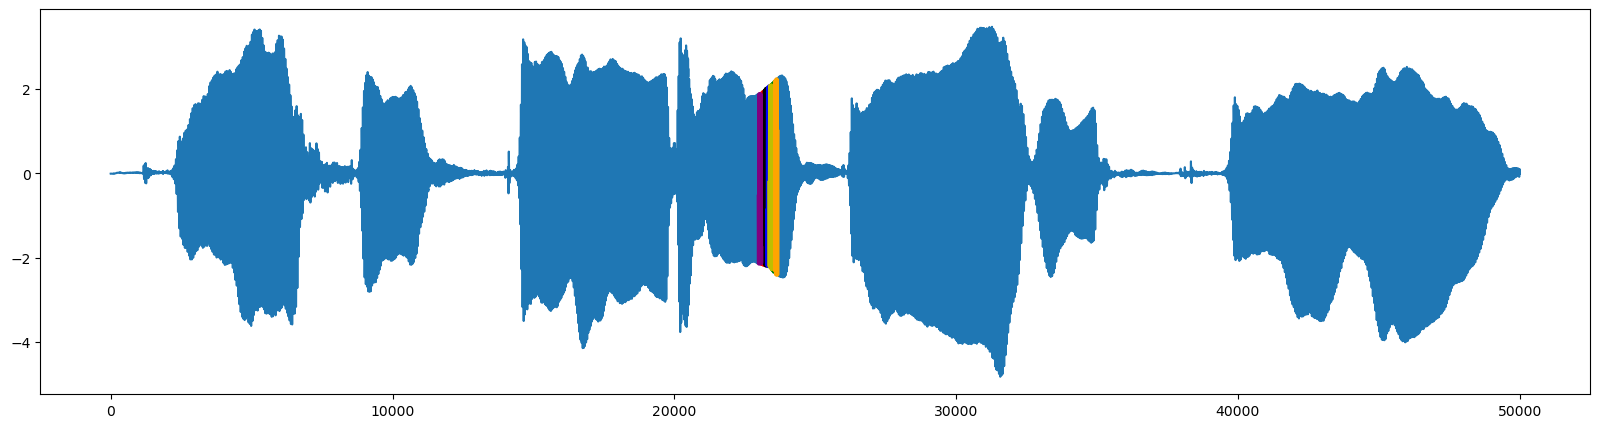

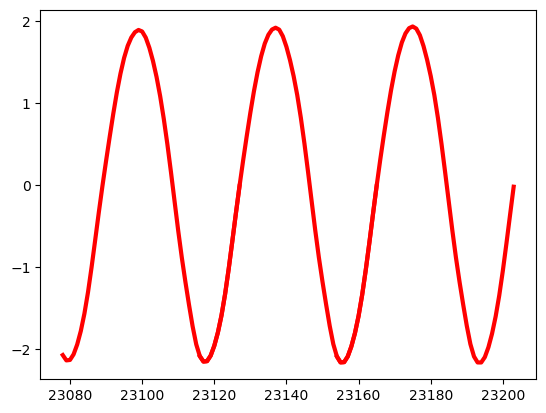

<Figure size 2000x500 with 0 Axes>

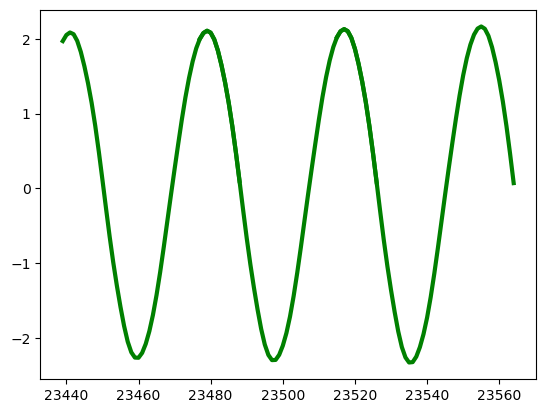

<Figure size 2000x500 with 0 Axes>

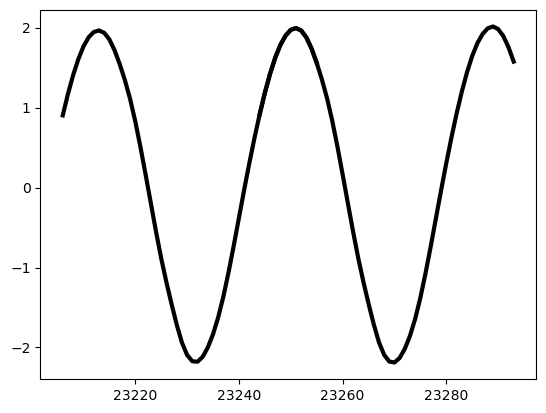

<Figure size 2000x500 with 0 Axes>

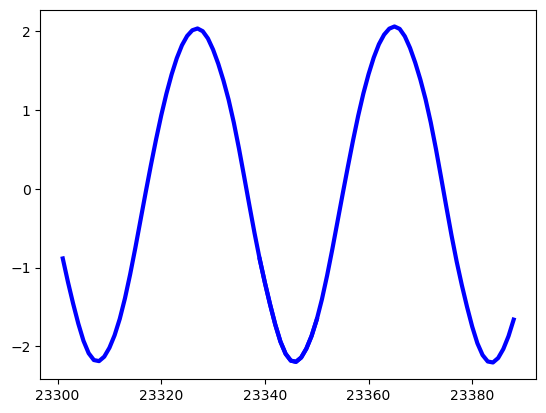

<Figure size 2000x500 with 0 Axes>

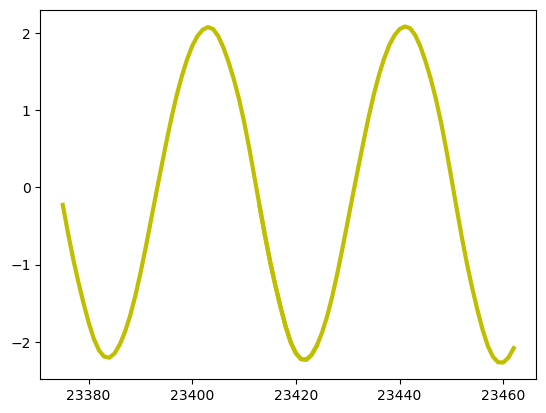

<Figure size 2000x500 with 0 Axes>

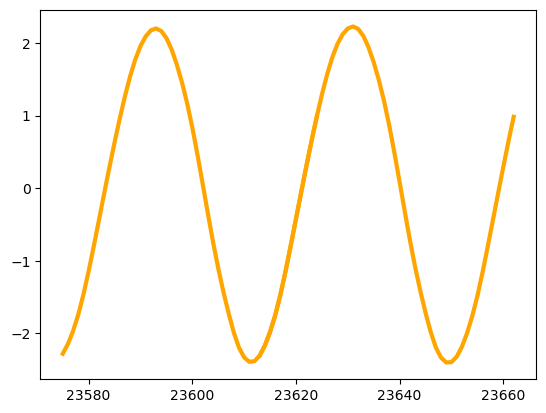

<Figure size 2000x500 with 0 Axes>

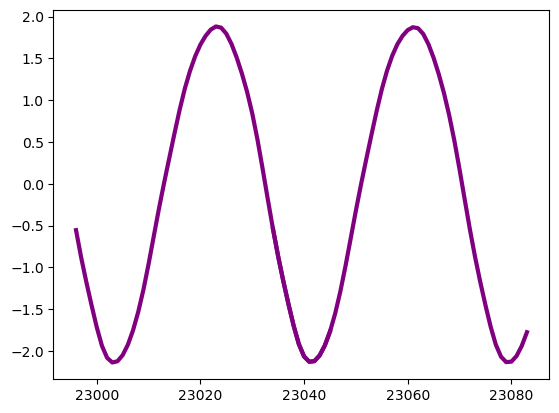

<Figure size 2000x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(tsX.values)
colors = ['r', 'g', 'k', 'b', 'y', 'orange', 'purple', 'pink', 'm', 'c'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.figure(figsize=(20,5))
    plt.show()

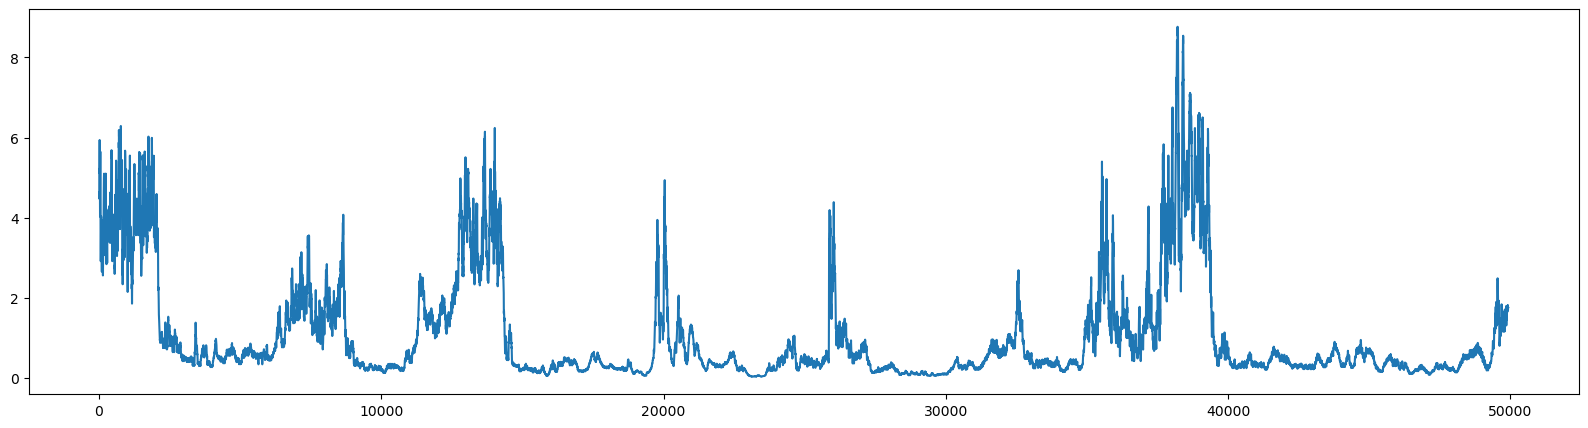

([[23422, 23460, 23498],
  [23099, 23137, 23175],
  [23239, 23277, 23315],
  [23540, 23578],
  [29232, 29324, 29370, 29416, 29462],
  [23017, 23055],
  [15813, 15854, 15895, 15936],
  [19266, 19342, 19380],
  [29574, 29620, 29666, 29712, 29758]],
 [0.03657468209920283,
  0.03766713974611996,
  0.038161398575448376,
  0.05281370574096607,
  0.058628097251919906,
  0.059287907797691164,
  0.060509445175991085,
  0.06320020366560032,
  0.06871710645906529])

In [ ]:
w = 75
mp, mpi = matrixProfile.stomp(tsX.values, w)

plt.figure(figsize=(20,5))
plt.plot(mp)
plt.show()
tsX

mo, mod  = motifs.motifs(tsX.values, (mp, mpi), max_motifs=10)
mo,mod

# ho sull'asse delle X solamente 50000 valori perchè ho ristretto la finestra

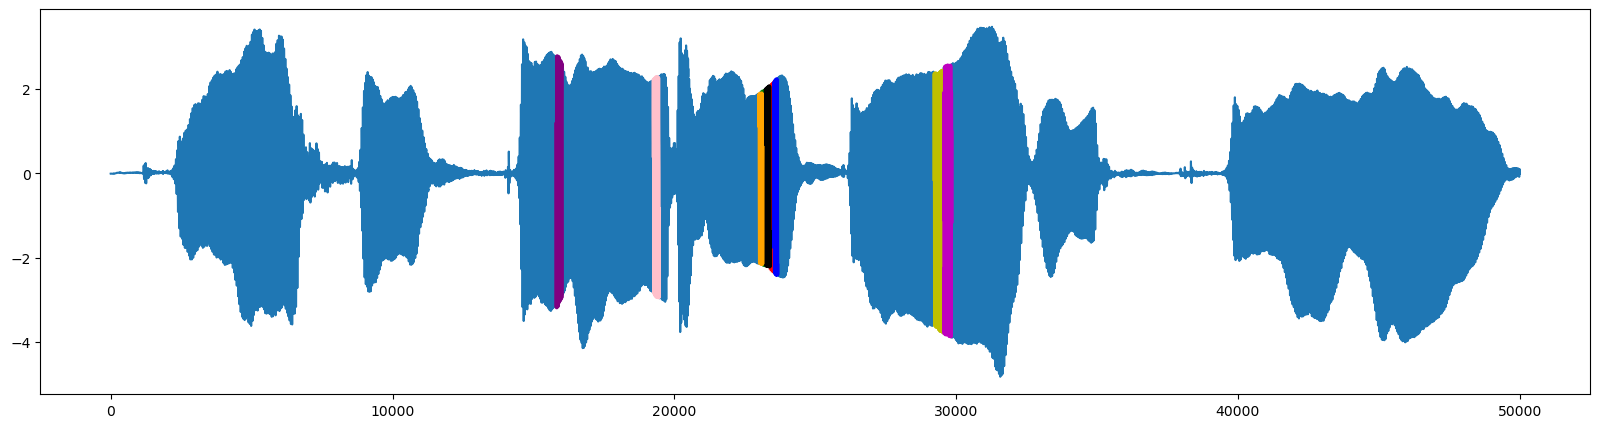

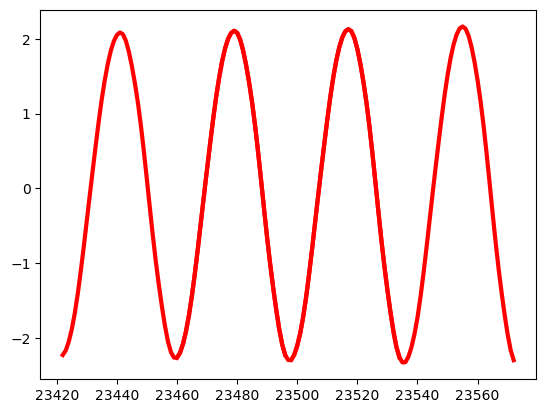

<Figure size 2000x500 with 0 Axes>

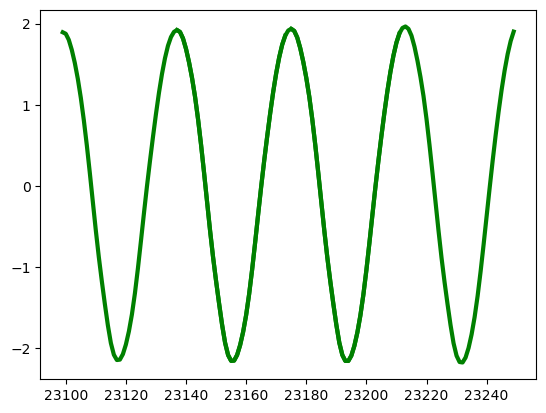

<Figure size 2000x500 with 0 Axes>

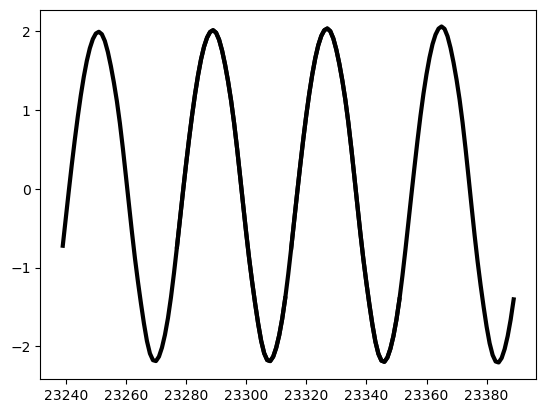

<Figure size 2000x500 with 0 Axes>

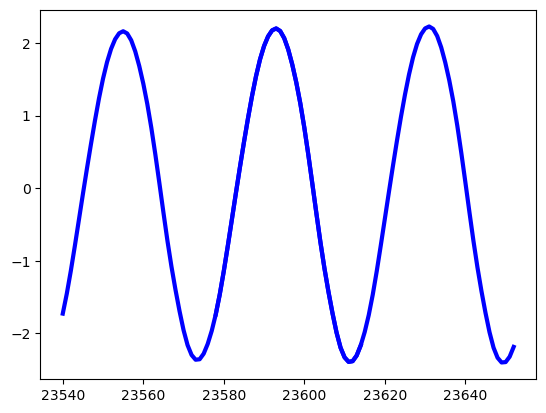

<Figure size 2000x500 with 0 Axes>

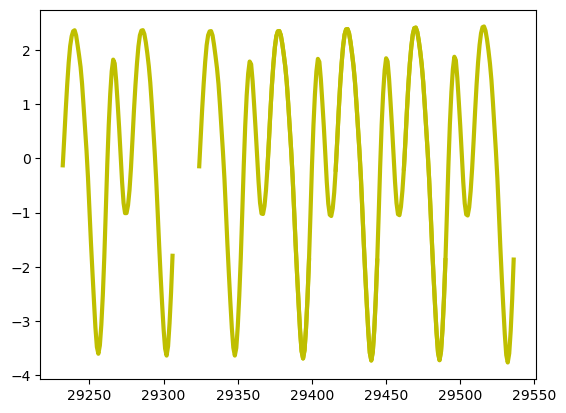

<Figure size 2000x500 with 0 Axes>

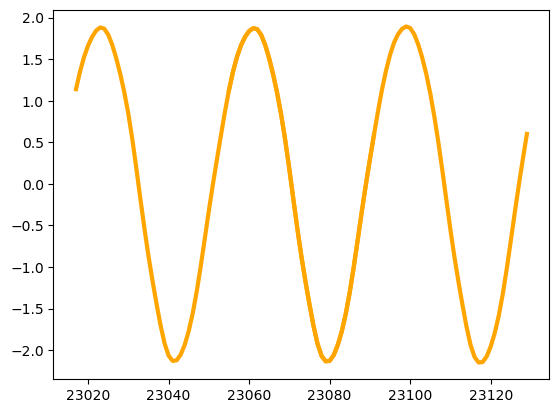

<Figure size 2000x500 with 0 Axes>

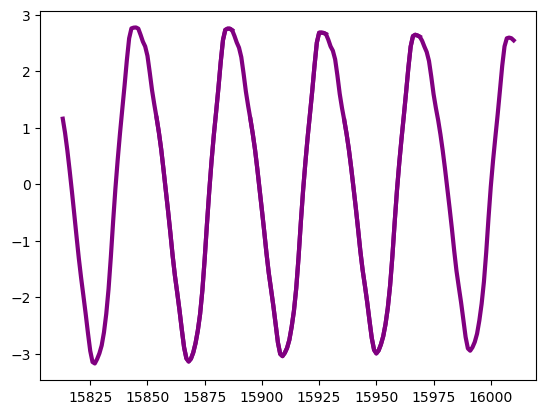

<Figure size 2000x500 with 0 Axes>

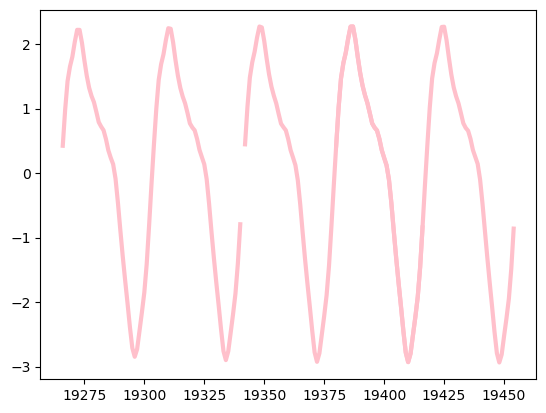

<Figure size 2000x500 with 0 Axes>

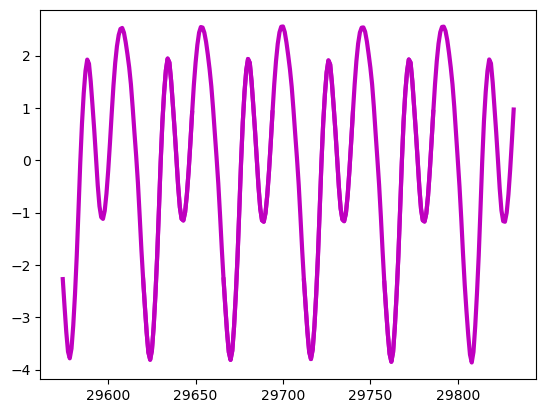

<Figure size 2000x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(tsX.values)
colors = ['r', 'g', 'k', 'b', 'y', 'orange', 'purple', 'pink', 'm', 'c'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.figure(figsize=(20,5))
    plt.show()

### W-PICCOLE DIMENSIONI=400, 500, 600, 850 --> migliore è 850

si iniziano a vedere dei pattern, questi valori sono molto simili, cambia poco tra la larghezza della finestra

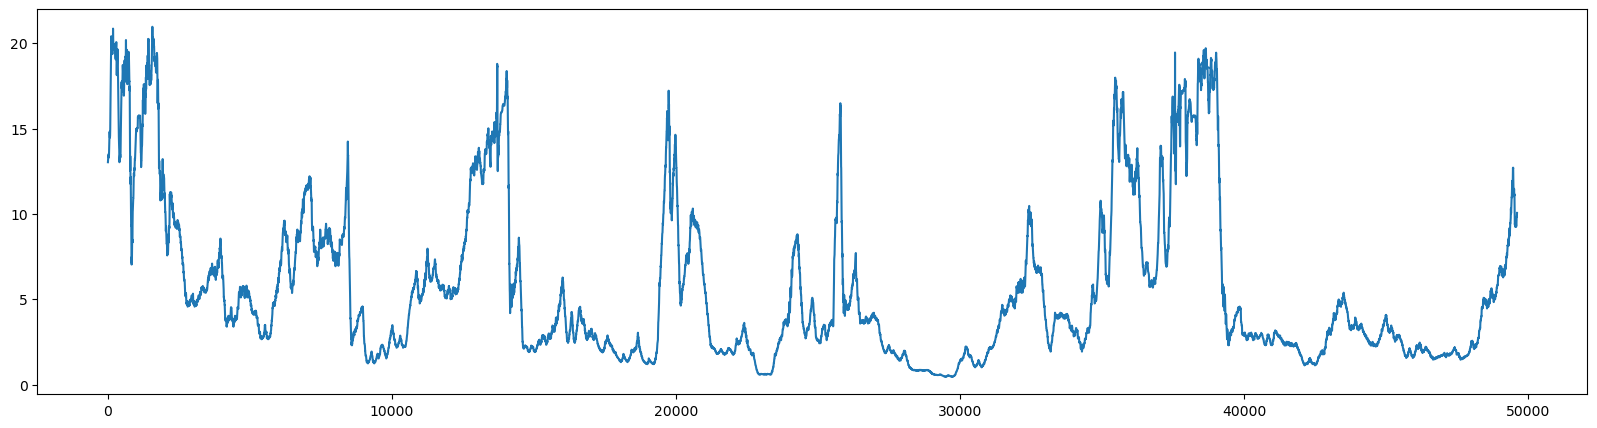

([[29011, 29241, 29471, 29701],
  [22853, 23081, 23309],
  [28307, 28537, 28767, 29917],
  [30528, 30760],
  [42118, 42484],
  [18754, 18982, 19210],
  [9152, 9375, 9777],
  [17789, 18059, 18291],
  [27627, 27857, 28088, 30251],
  [46421, 46651, 46926, 47156, 47385, 47614, 47844]],
 [0.4599528802094125,
  0.5798692430525875,
  0.8130774503573271,
  1.0211197481408383,
  1.1329759447843177,
  1.198440151826232,
  1.243180125650127,
  1.3164116524285334,
  1.3988414270692895,
  1.4708405299957454])

In [ ]:
w = 400
mp, mpi = matrixProfile.stomp(tsX.values, w)

plt.figure(figsize=(20,5))
plt.plot(mp)
plt.show()
tsX

mo, mod  = motifs.motifs(tsX.values, (mp, mpi), max_motifs=10)
mo,mod

# ho sull'asse delle X solamente 50000 valori perchè ho ristretto la finestra

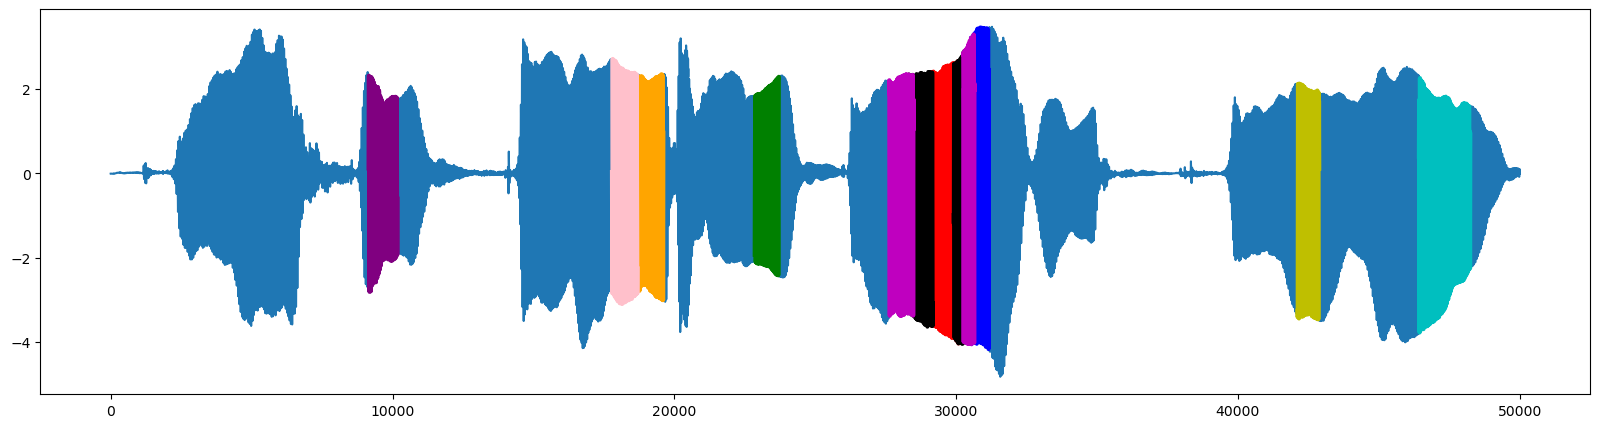

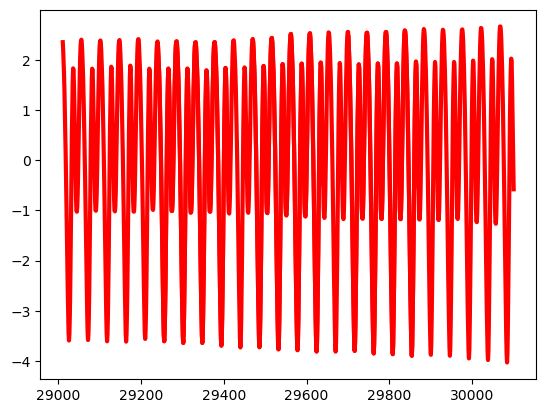

<Figure size 2000x500 with 0 Axes>

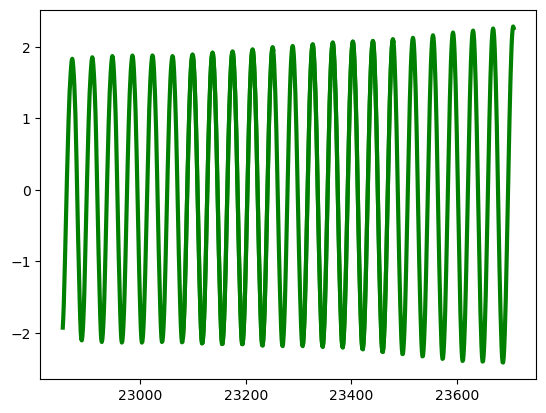

<Figure size 2000x500 with 0 Axes>

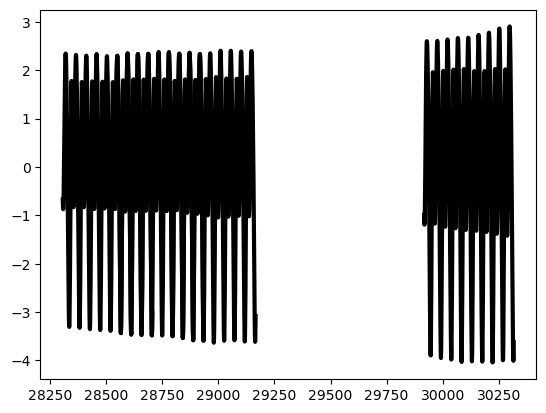

<Figure size 2000x500 with 0 Axes>

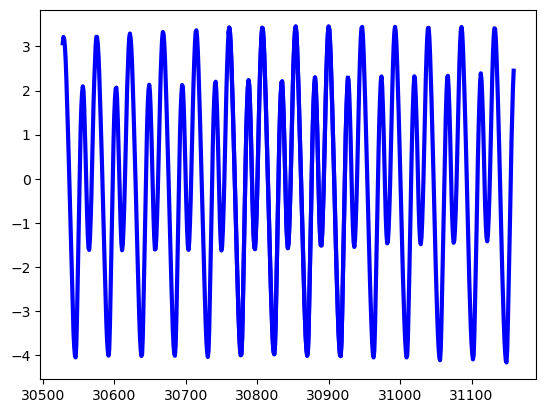

<Figure size 2000x500 with 0 Axes>

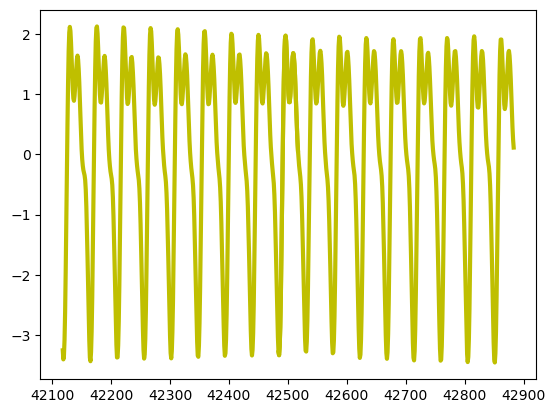

<Figure size 2000x500 with 0 Axes>

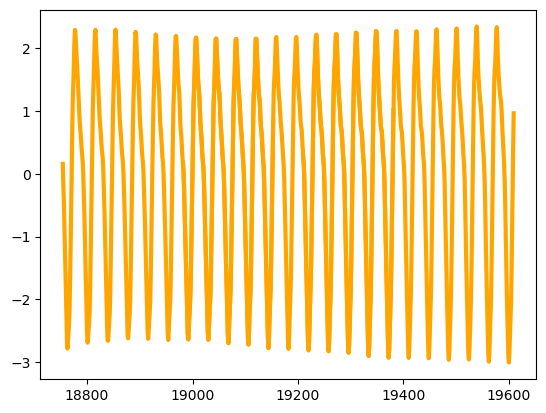

<Figure size 2000x500 with 0 Axes>

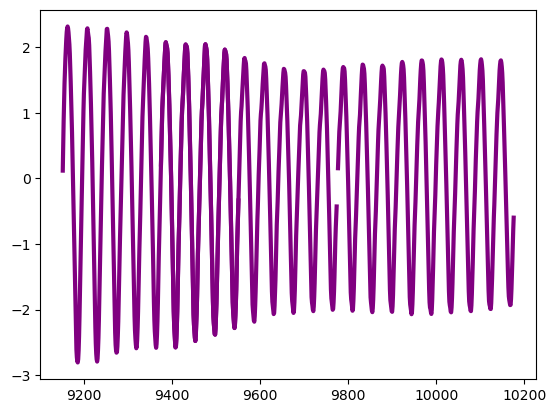

<Figure size 2000x500 with 0 Axes>

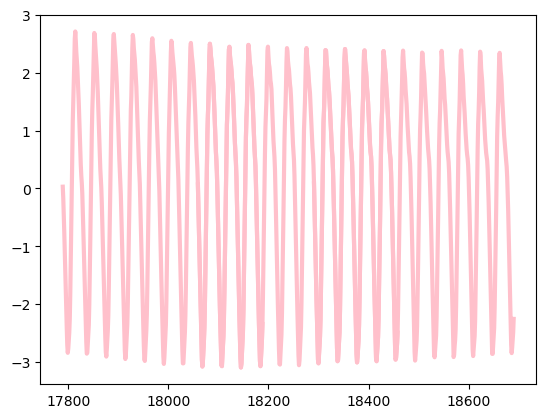

<Figure size 2000x500 with 0 Axes>

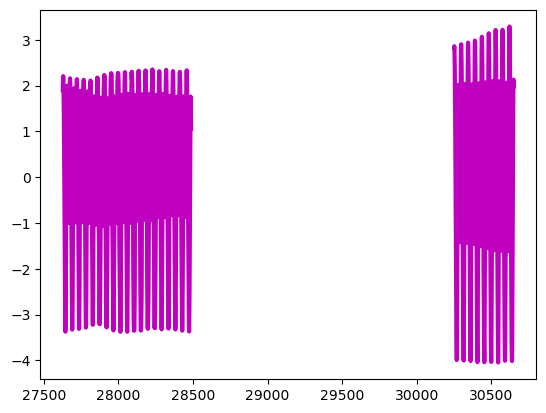

<Figure size 2000x500 with 0 Axes>

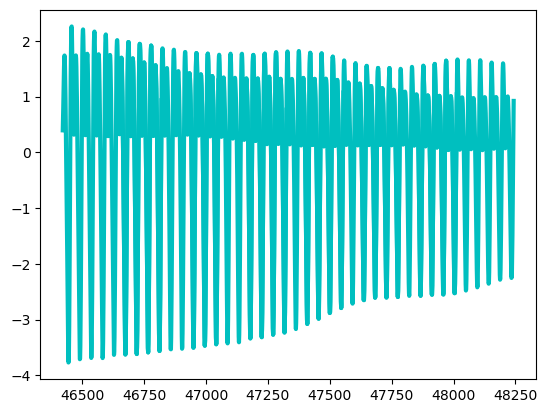

<Figure size 2000x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(tsX.values)
colors = ['r', 'g', 'k', 'b', 'y', 'orange', 'purple', 'pink', 'm', 'c'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.figure(figsize=(20,5))
    plt.show()

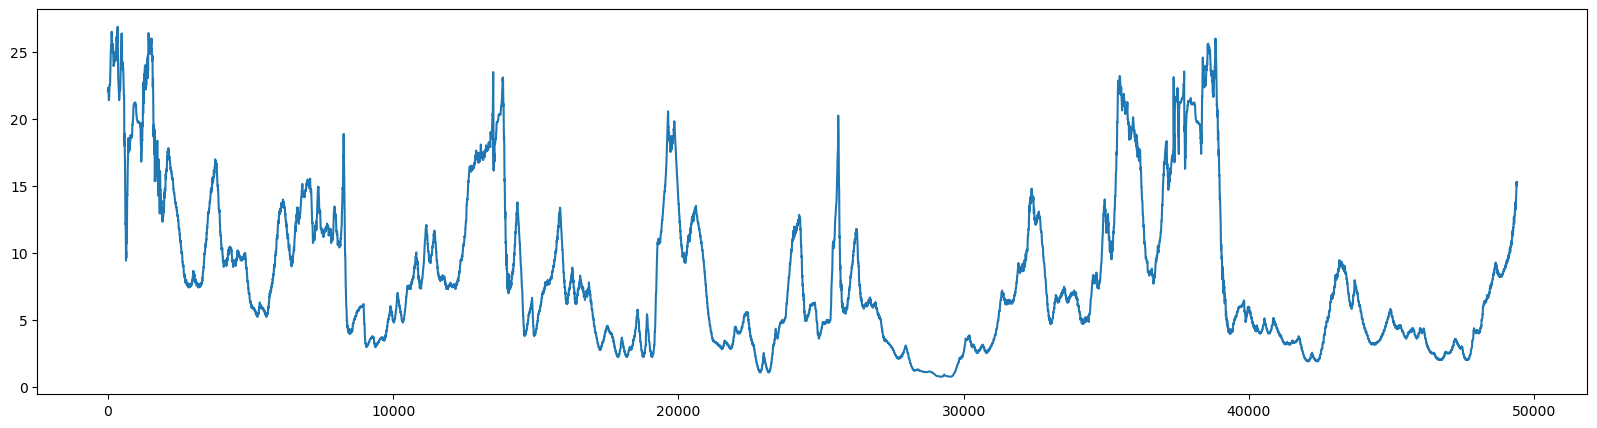

([[28566, 28888, 29210, 29532],
  [22865, 23169],
  [42071, 42391],
  [27673, 28226, 29836],
  [46399, 46766, 47133, 47683],
  [18778, 19082],
  [17201, 17894, 18203],
  [30137, 30461, 30786],
  [21221, 21526, 21832]],
 [0.7326296400798643,
  1.0480221044131042,
  1.8657814242398667,
  1.951059757026561,
  1.9830860554485916,
  2.199174588344932,
  2.2187013553687946,
  2.4978205282825914,
  2.7982182619684295])

In [ ]:
w = 600
mp, mpi = matrixProfile.stomp(tsX.values, w)

plt.figure(figsize=(20,5))
plt.plot(mp)
plt.show()
tsX

mo, mod  = motifs.motifs(tsX.values, (mp, mpi), max_motifs=10)
mo,mod


# ho sull'asse delle X solamente 50000 valori perchè ho ristretto la finestra

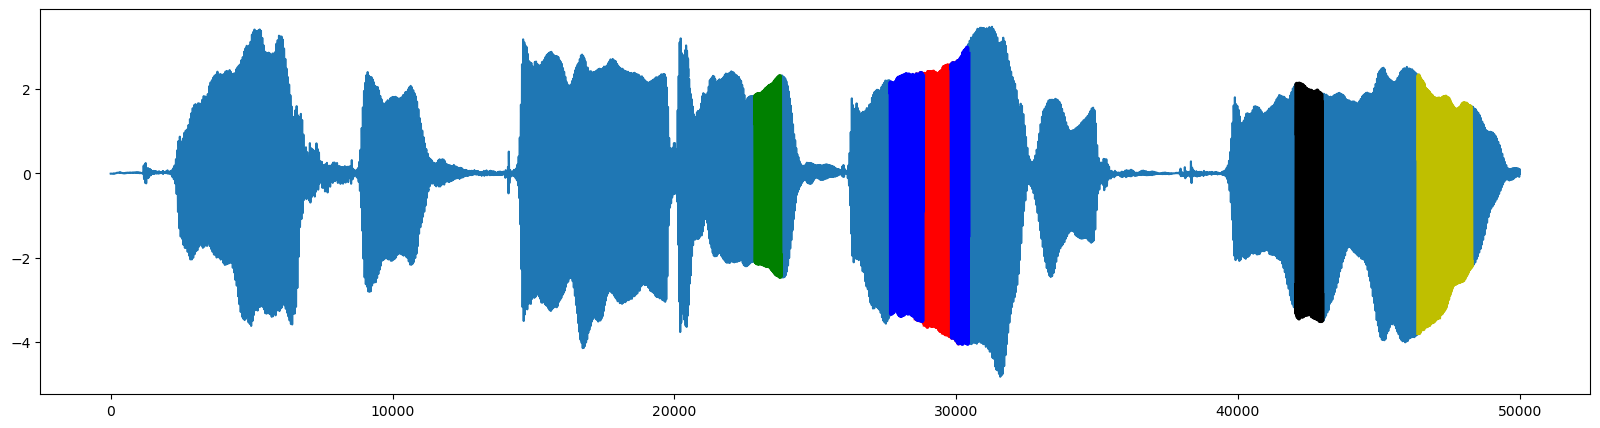

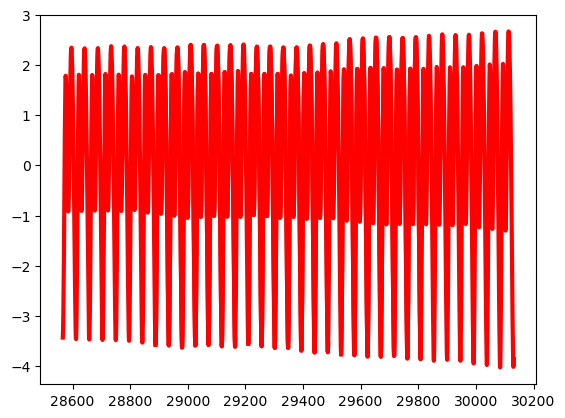

<Figure size 2000x500 with 0 Axes>

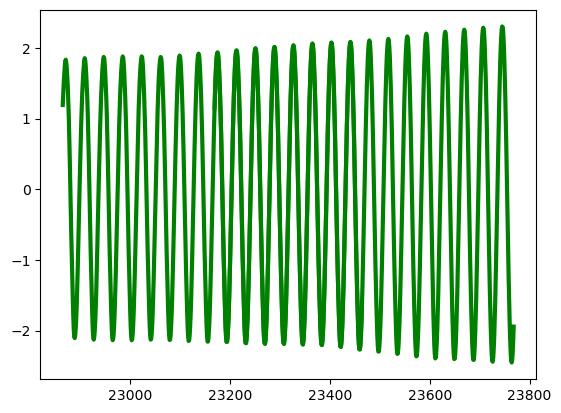

<Figure size 2000x500 with 0 Axes>

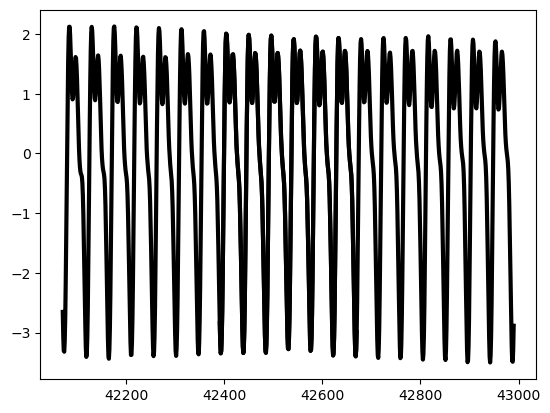

<Figure size 2000x500 with 0 Axes>

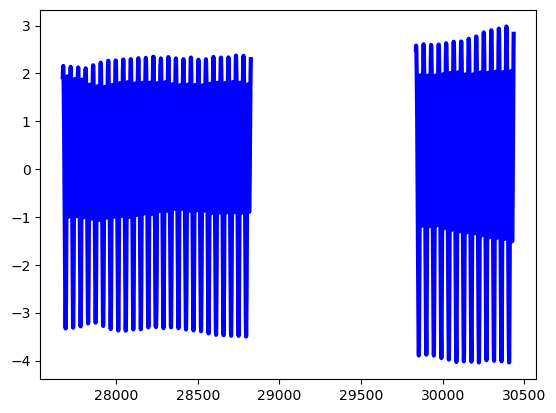

<Figure size 2000x500 with 0 Axes>

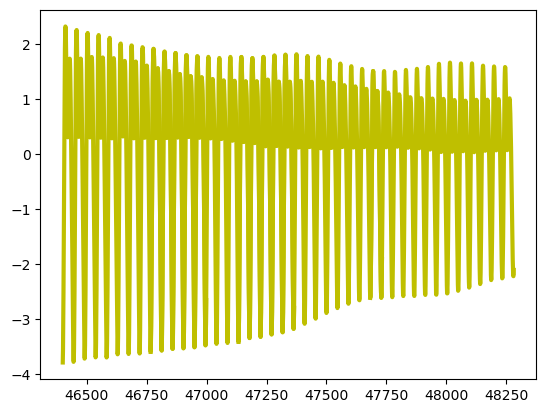

<Figure size 2000x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(tsX.values)
colors = ['r', 'g', 'k', 'b', 'y',][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.figure(figsize=(20,5))
    plt.show()

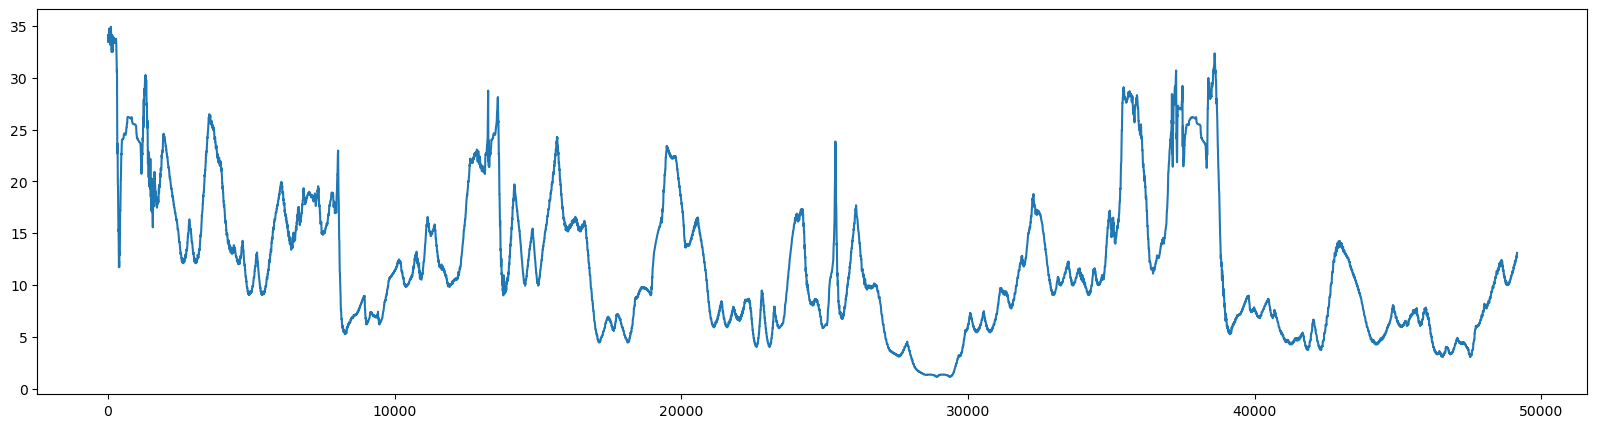

([[28456, 28916, 29376],
  [27523, 28030, 29825],
  [46562, 47021, 47525],
  [41856, 42313, 44614],
  [22635, 23092],
  [41239, 44180],
  [17118, 17657, 18120],
  [8269, 13914, 25580, 39130],
  [45070, 46133],
  [26634, 27092]],
 [1.1380499608829375,
  2.8732437322940223,
  3.047769001686899,
  3.758381608487755,
  4.050100589785169,
  4.251787268899499,
  4.451569735890987,
  5.2419816514114235,
  5.290148436924777,
  5.410041386924025])

In [ ]:
w = 850
mp, mpi = matrixProfile.stomp(tsX.values, w)

plt.figure(figsize=(20,5))
plt.plot(mp)
plt.show()
tsX


#CALCOLO I MOTIFS
mo, mod  = motifs.motifs(tsX.values, (mp, mpi), max_motifs=10)
mo,mod

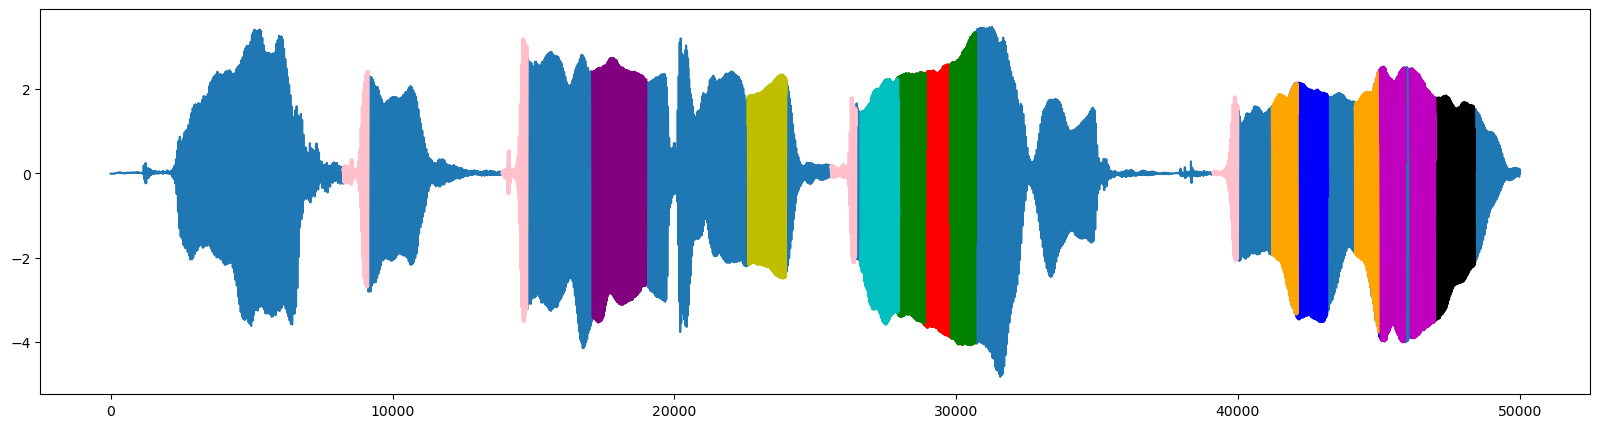

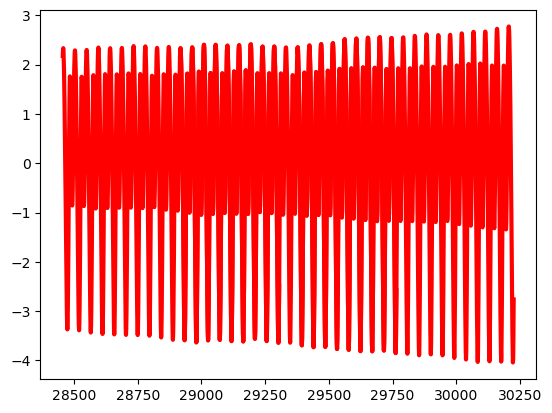

<Figure size 2000x500 with 0 Axes>

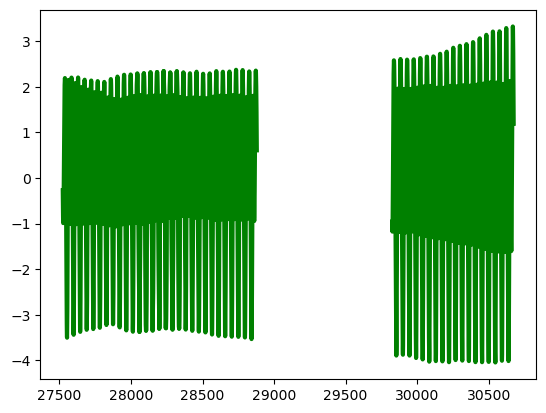

<Figure size 2000x500 with 0 Axes>

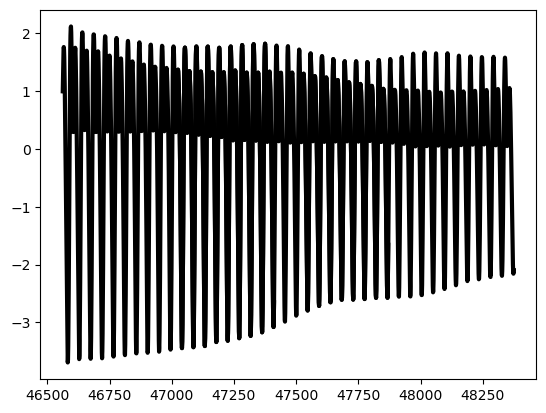

<Figure size 2000x500 with 0 Axes>

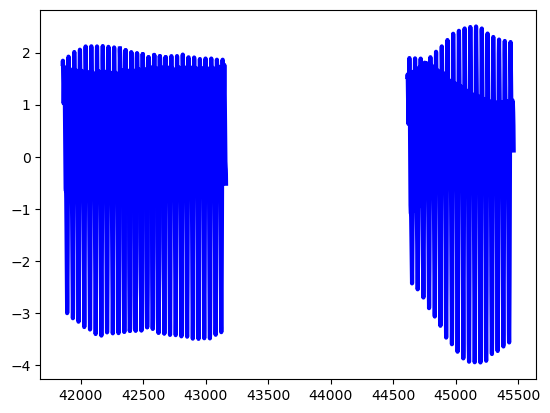

<Figure size 2000x500 with 0 Axes>

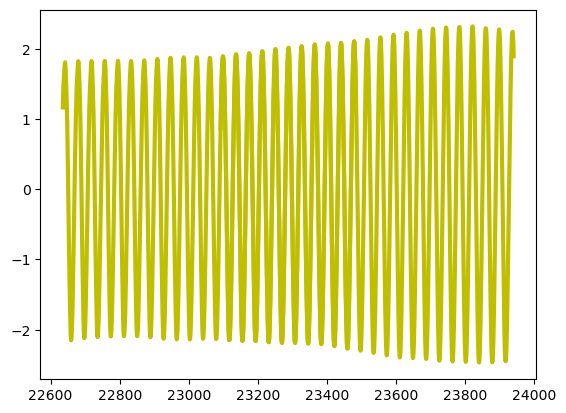

<Figure size 2000x500 with 0 Axes>

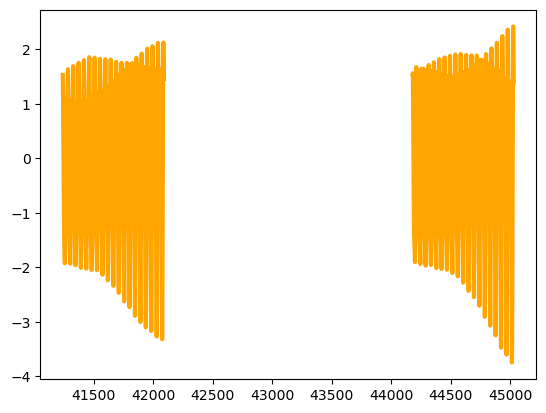

<Figure size 2000x500 with 0 Axes>

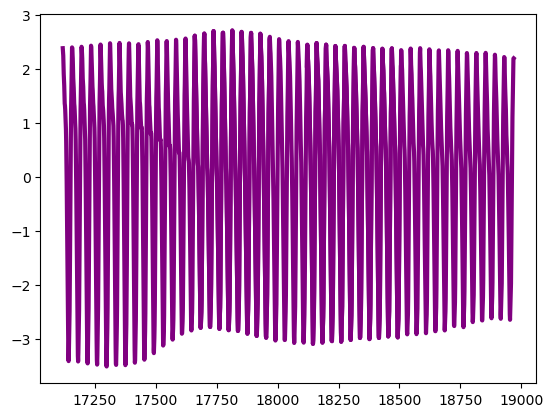

<Figure size 2000x500 with 0 Axes>

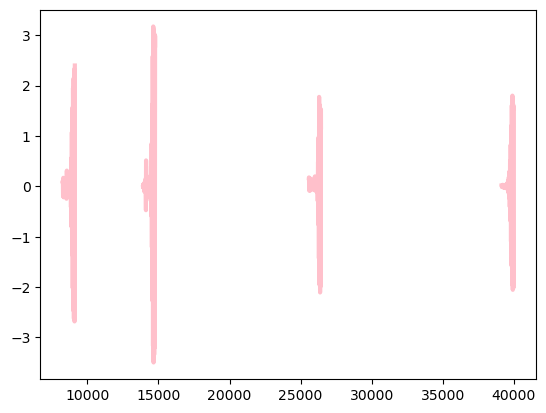

<Figure size 2000x500 with 0 Axes>

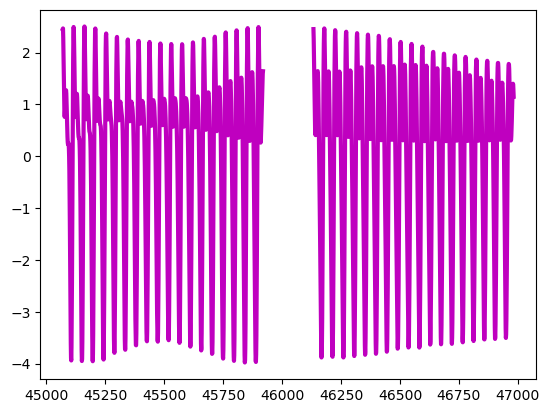

<Figure size 2000x500 with 0 Axes>

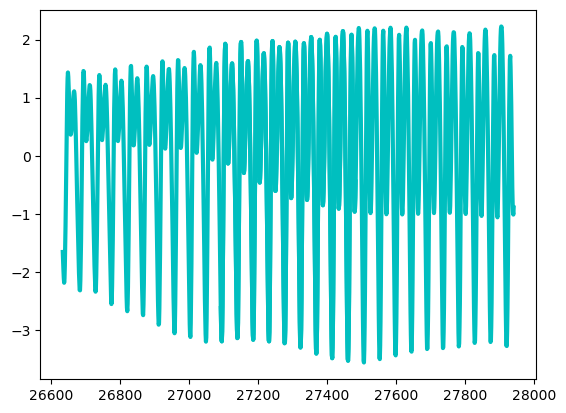

<Figure size 2000x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(tsX.values)
colors = ['r', 'g', 'k', 'b', 'y', 'orange', 'purple', 'pink', 'm', 'c'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.figure(figsize=(20,5))
    plt.show()

In [ ]:
#Calcolo i DISCORDS

from matrixprofile.discords import discords
anoms = discords(mp, ex_zone=3, k=5)
anoms

array([ 1796,  1917, 38280, 14047, 13877])

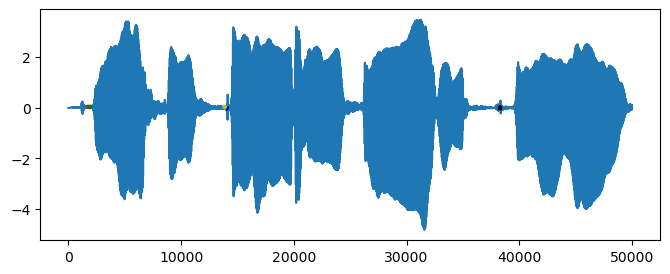

In [ ]:
plt.figure(figsize=(8, 3))

plt.plot(tsX.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = tsX.values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)
plt.show()

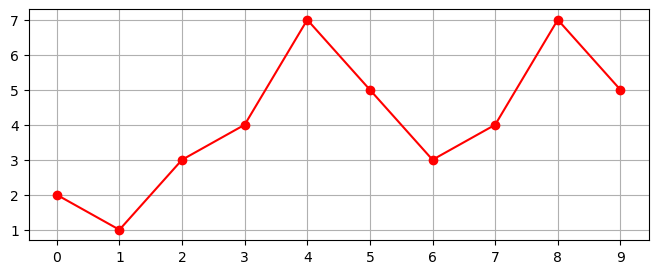

In [ ]:
plt.figure(figsize=(8, 3))
x = np.array([2,1,3,4,7,5,3,4,7,5])
plt.plot(range(len(x)), x, marker='o', color='r')
plt.xticks(range(len(x)))
plt.grid()
plt.show()

In [ ]:
w = 3
mp = np.array([np.inf] * (len(x) - w + 1))
for i in range(len(x) - w + 1):
    #print('a', x[i:i+w])
    for j in range(len(x) - w + 1):
        if i == j:
            continue
        #print('b', x[j:j+w])
        val = 0
        for k in range(w):
            val += np.abs(x[i + k] - x[j + k])
        #print(val)
        mp[i] = min(mp[i], val)
    #print('')

In [ ]:
mp

array([4., 4., 0., 0., 5., 4., 0., 0.])

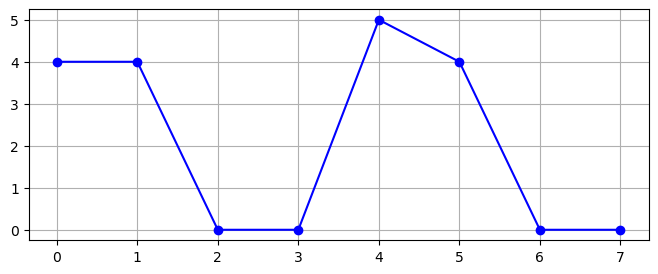

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(mp, marker='o', color='b')
plt.xticks(range(len(mp)))
plt.grid()
plt.show()

In [ ]:
'''#CI METTE TANTO A RUNNARE
mp, mpi = matrixProfile.naiveMP(tsX.values, m=12)
mp, mpi



plt.plot(mp)
plt.show()'''

'#CI METTE TANTO A RUNNARE\nmp, mpi = matrixProfile.naiveMP(tsX.values, m=12)\nmp, mpi\n\n\n\nplt.plot(mp)\nplt.show()'

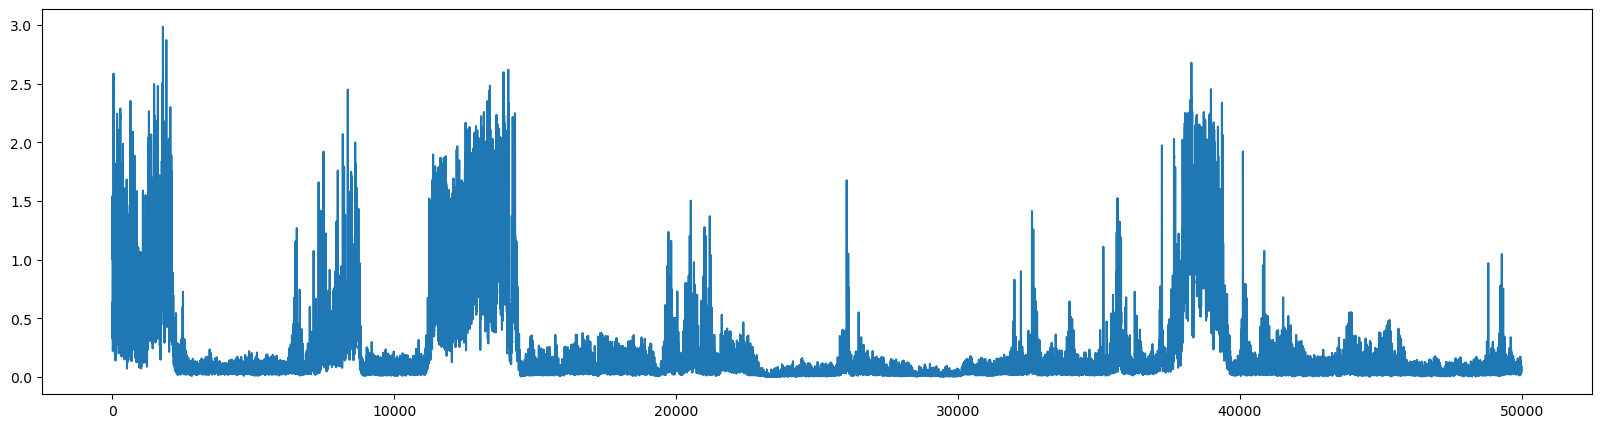

In [ ]:
import stumpy # https://stumpy.readthedocs.io/en/latest/api.html
matrix_profile = stumpy.stump(tsX.values.astype(float), m=12)


mp = matrix_profile[:,0]
mpi = matrix_profile[:,1]
plt.figure(figsize=(20,5))
plt.plot(mp)
plt.show()

la migliore viene con w=850

### W-GRANDI DIMENSIONI: 925, 1000, 1500, 2000 --> migliore 1500

Con queste dimensioni si trovano pattern di dato molto grandi, potrebbero ancora andare bene ma si prendono tante istanze 

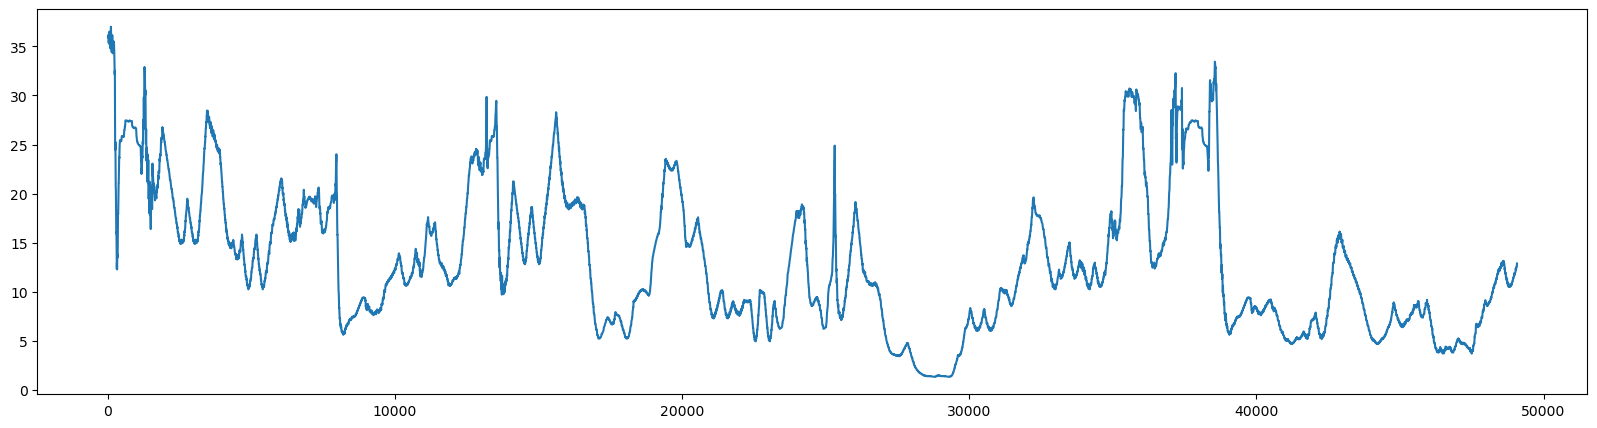

([[28242, 28748, 29254],
  [27568, 29731],
  [46488, 46993, 47497],
  [41211, 44197],
  [22561, 23056, 24508],
  [41767, 42270, 44662],
  [17123, 18048],
  [8194, 25505, 39055],
  [30283, 30747]],
 [1.3434438275932155,
  3.434249627905405,
  3.703428650234585,
  4.6899975742453055,
  4.959795361181385,
  5.200586908991081,
  5.243853646561549,
  5.622849418328083,
  5.996761875604382])

In [ ]:
w = 925
mp, mpi = matrixProfile.stomp(tsX.values, w)

plt.figure(figsize=(20,5))
plt.plot(mp)
plt.show()
tsX

mo, mod  = motifs.motifs(tsX.values, (mp, mpi), max_motifs=10)
mo,mod

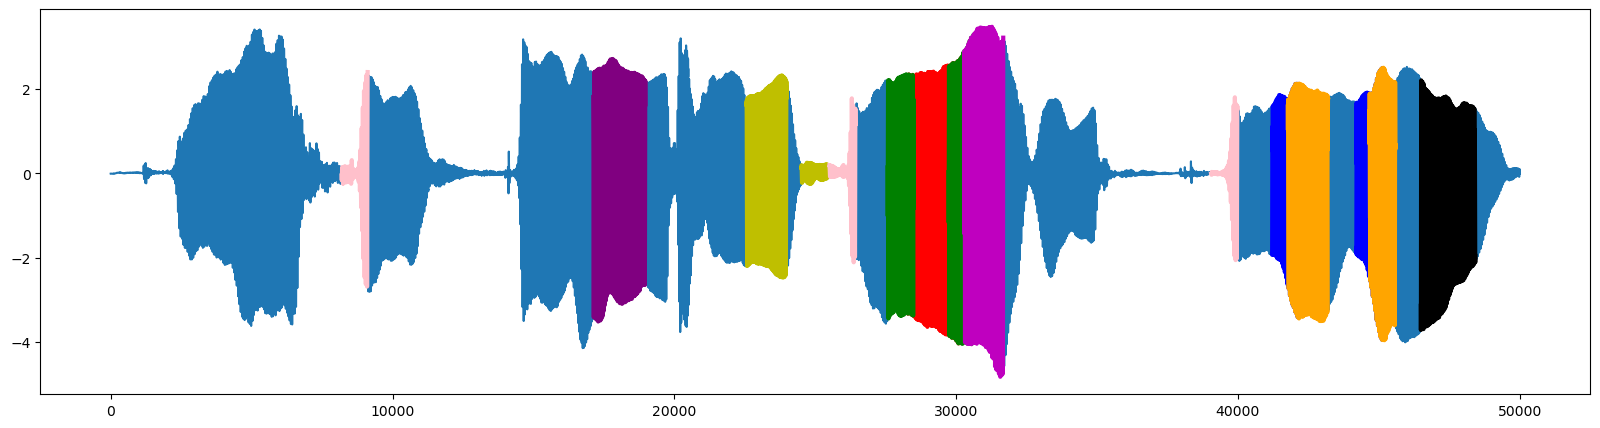

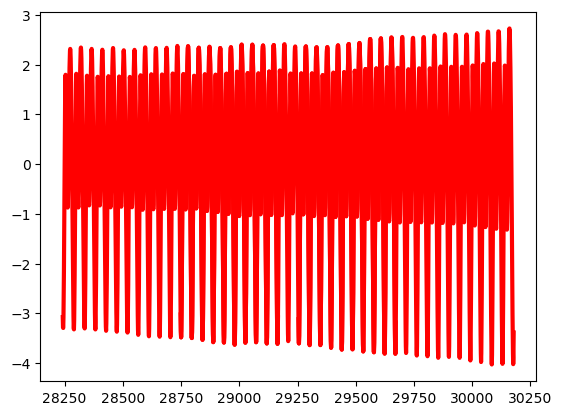

<Figure size 2000x500 with 0 Axes>

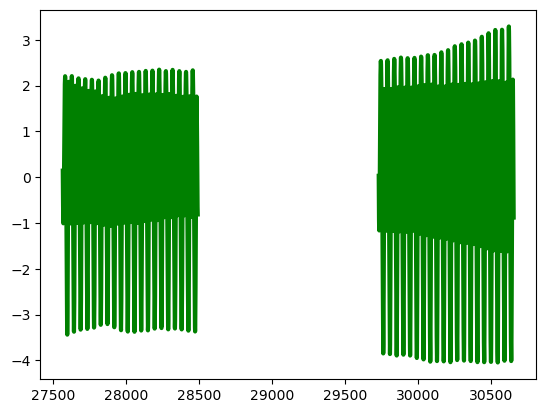

<Figure size 2000x500 with 0 Axes>

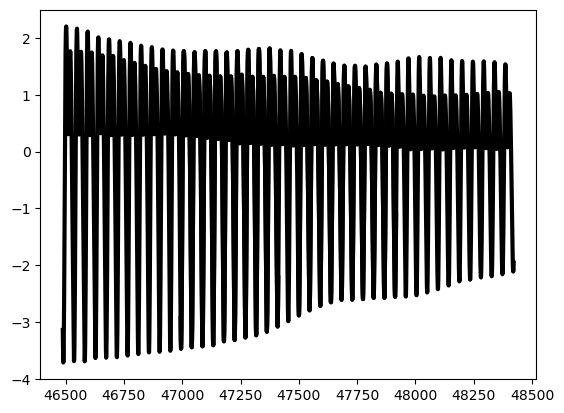

<Figure size 2000x500 with 0 Axes>

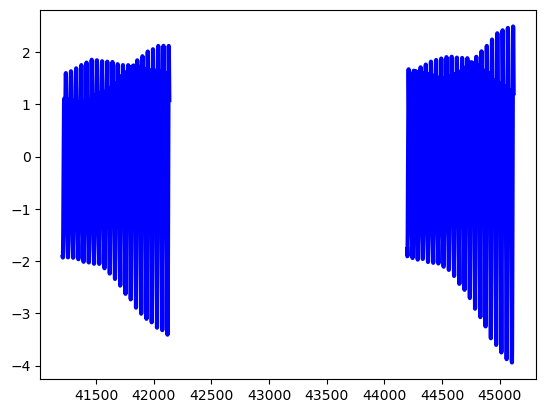

<Figure size 2000x500 with 0 Axes>

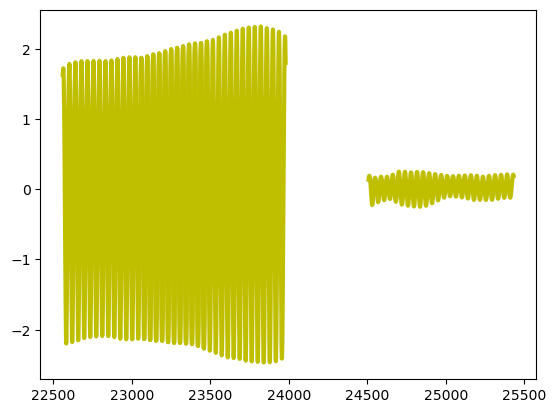

<Figure size 2000x500 with 0 Axes>

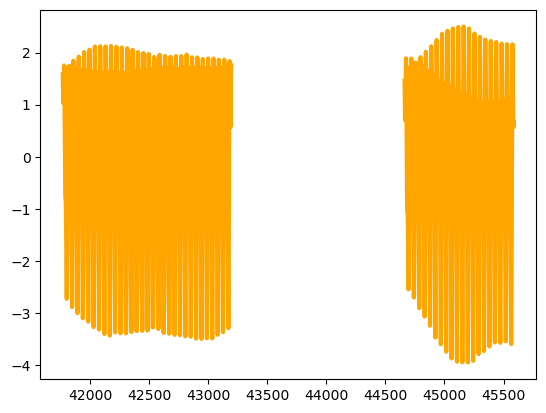

<Figure size 2000x500 with 0 Axes>

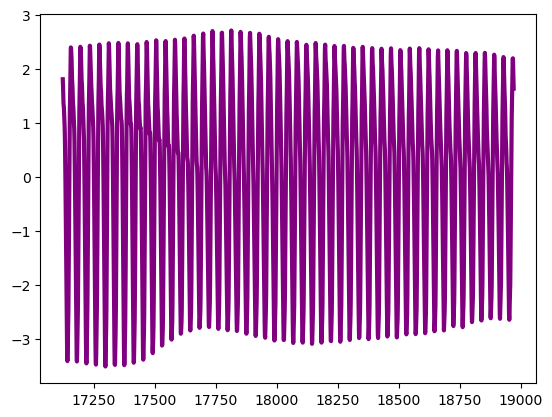

<Figure size 2000x500 with 0 Axes>

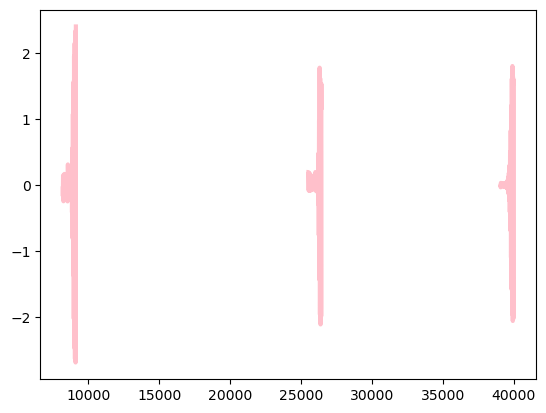

<Figure size 2000x500 with 0 Axes>

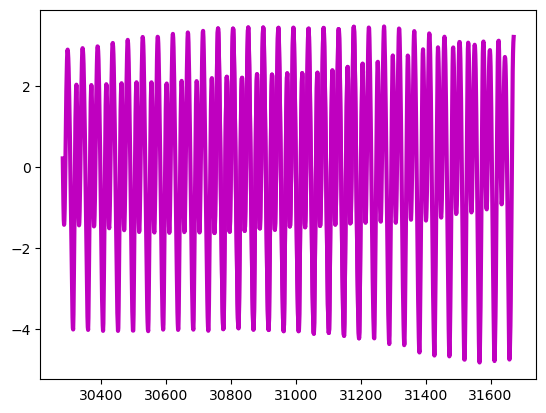

<Figure size 2000x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(tsX.values)
colors = ['r', 'g', 'k', 'b', 'y', 'orange', 'purple', 'pink', 'm', 'c'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.figure(figsize=(20,5))
    plt.show()

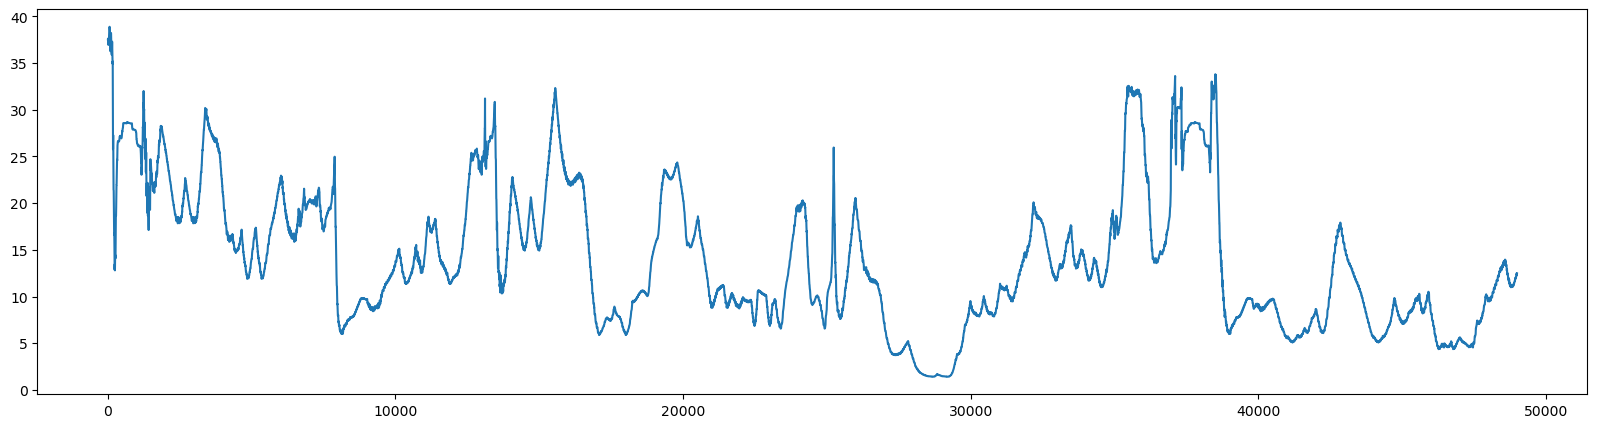

([[28179, 28685, 29191],
  [27398, 29699],
  [46272, 46777, 47465],
  [41194, 44180],
  [17088, 18013],
  [8163, 25474, 39024],
  [41716, 42264],
  [21866, 23395, 24924],
  [18548, 21336, 22485, 24394],
  [45057, 45612]],
 [1.403543292314467,
  3.7095013144433233,
  4.36263736675319,
  5.077871972635507,
  5.90110034304461,
  5.987101340430127,
  6.082365124375217,
  6.56452556142439,
  6.843192284568815,
  7.0587145040427135])

In [ ]:
w = 1000
mp, mpi = matrixProfile.stomp(tsX.values, w)

plt.figure(figsize=(20,5))
plt.plot(mp)
plt.show()
tsX

mo, mod  = motifs.motifs(tsX.values, (mp, mpi), max_motifs=10)
mo,mod

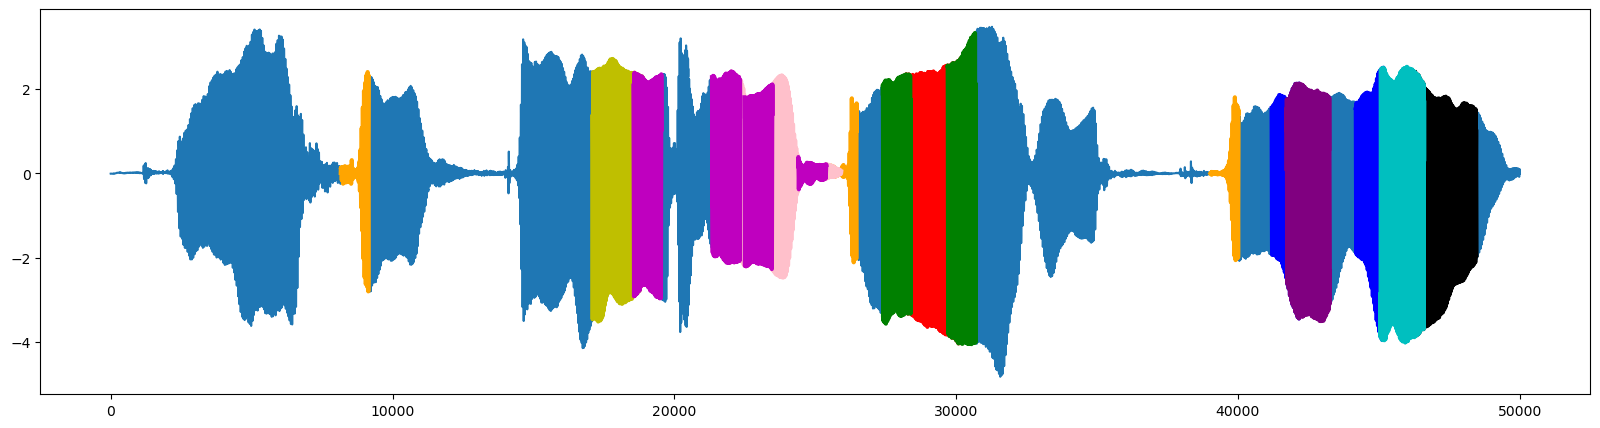

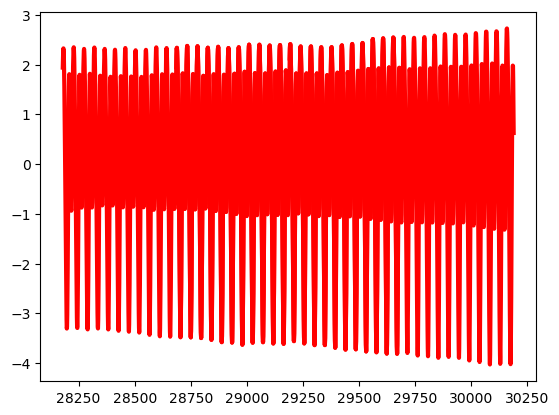

<Figure size 2000x500 with 0 Axes>

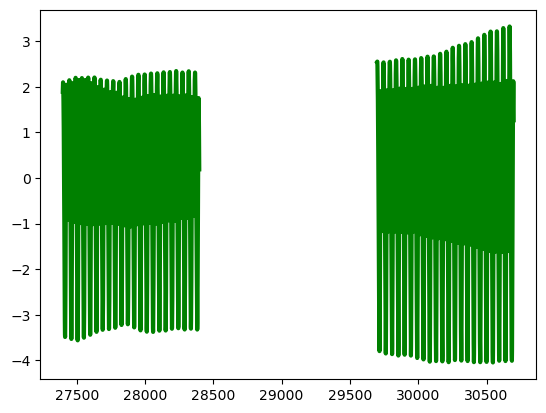

<Figure size 2000x500 with 0 Axes>

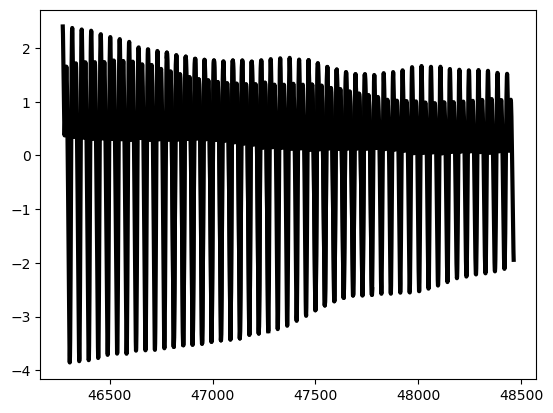

<Figure size 2000x500 with 0 Axes>

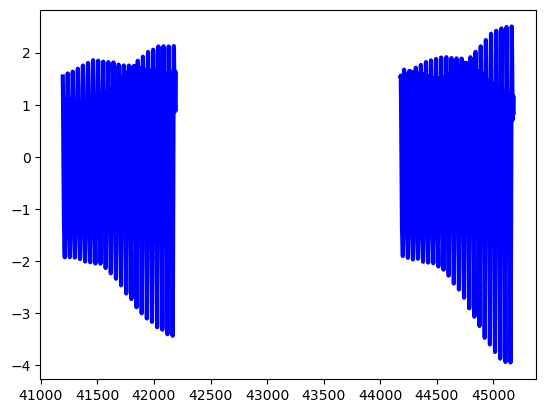

<Figure size 2000x500 with 0 Axes>

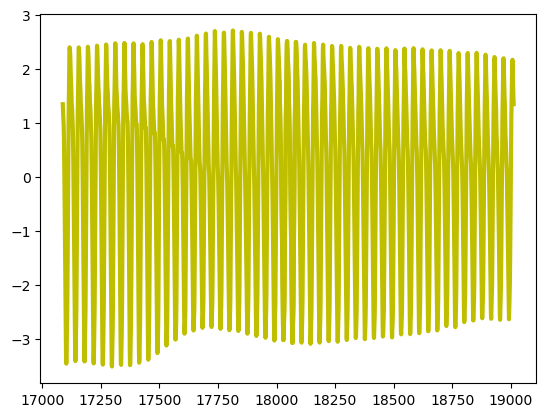

<Figure size 2000x500 with 0 Axes>

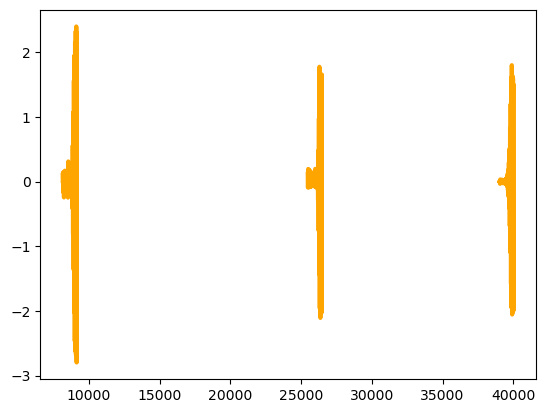

<Figure size 2000x500 with 0 Axes>

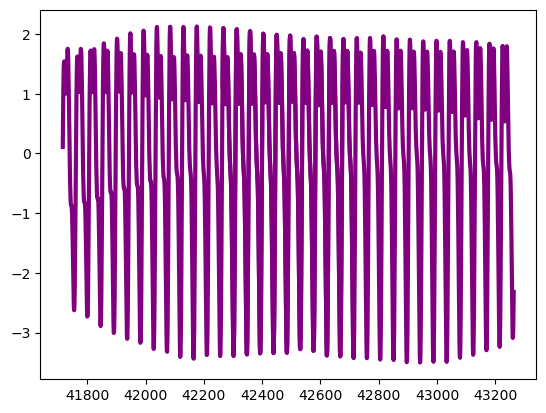

<Figure size 2000x500 with 0 Axes>

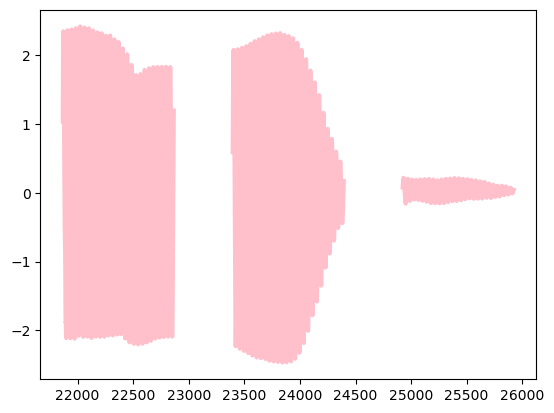

<Figure size 2000x500 with 0 Axes>

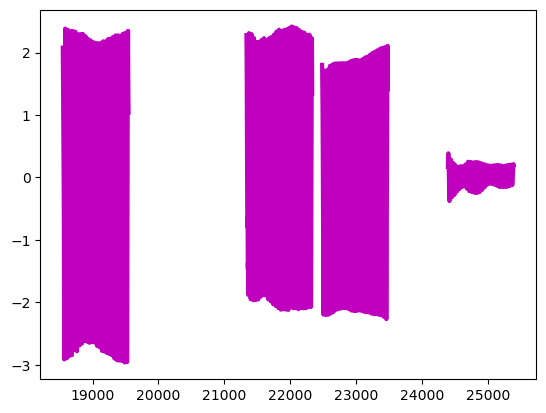

<Figure size 2000x500 with 0 Axes>

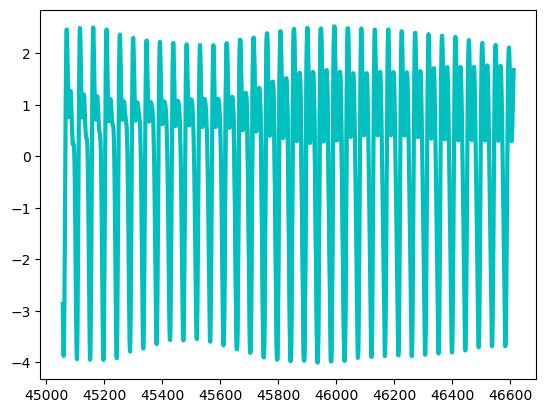

<Figure size 2000x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(tsX.values)
colors = ['r', 'g', 'k', 'b', 'y', 'orange', 'purple', 'pink', 'm', 'c'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.figure(figsize=(20,5))
    plt.show()

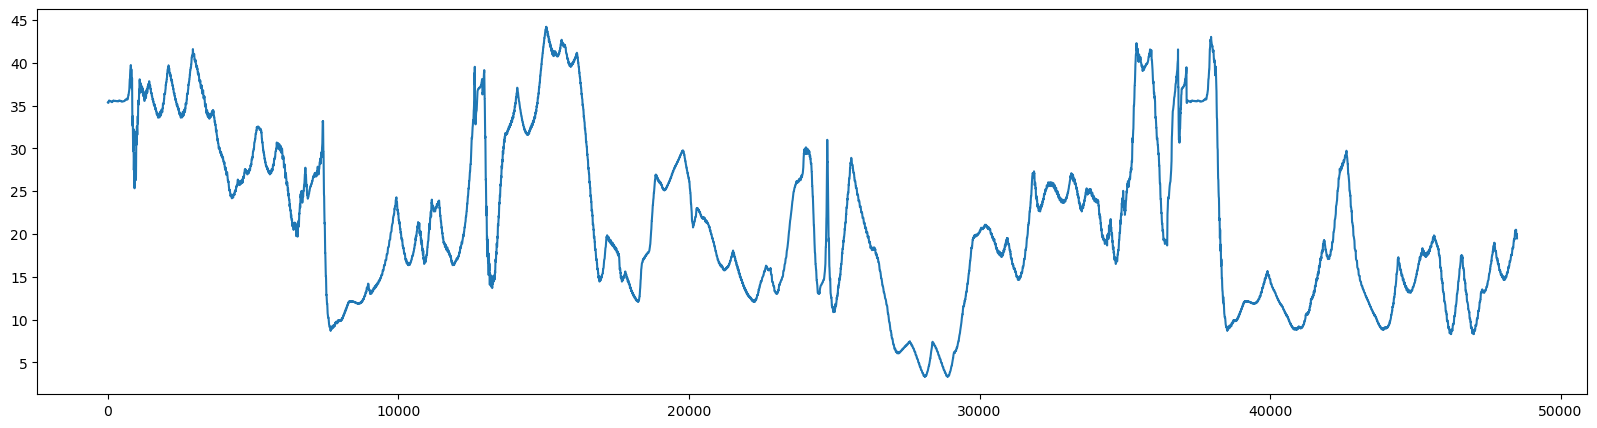

([[28126, 28908],
  [46225, 47005],
  [7663, 13307, 24974, 38524],
  [40925, 43911],
  [8630, 39450],
  [18238, 21065, 22251],
  [17395, 20146, 23017],
  [27051, 29675, 44834]],
 [3.3107882858076767,
  8.289674219933659,
  8.69226562426067,
  8.80667241894465,
  11.831812560436363,
  12.068971298680637,
  12.990561885512575,
  13.135833106578158])

In [ ]:
w = 1500
mp, mpi = matrixProfile.stomp(tsX.values, w)

plt.figure(figsize=(20,5))
plt.plot(mp)
plt.show()
tsX

mo, mod  = motifs.motifs(tsX.values, (mp, mpi), max_motifs=10)
mo,mod

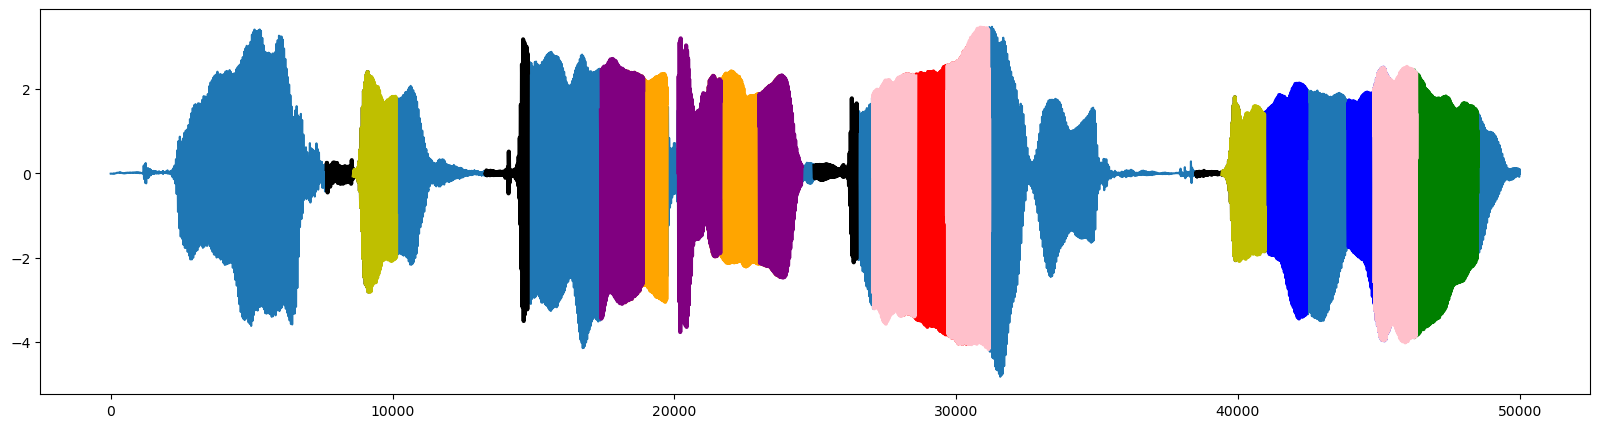

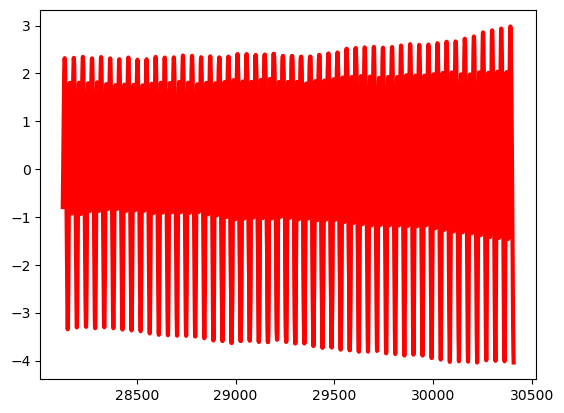

<Figure size 2000x500 with 0 Axes>

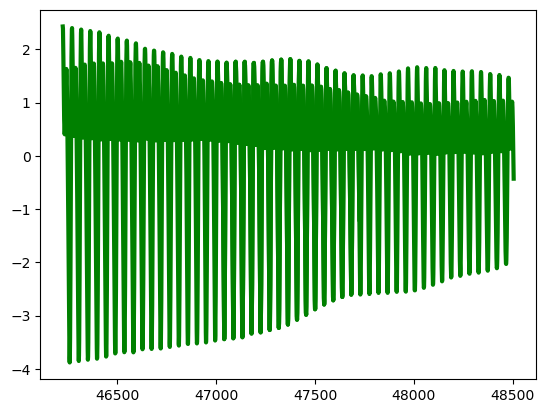

<Figure size 2000x500 with 0 Axes>

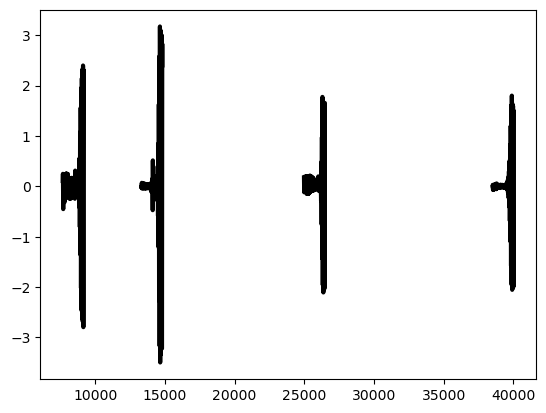

<Figure size 2000x500 with 0 Axes>

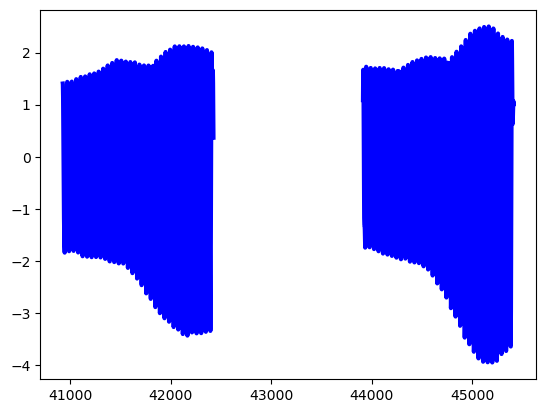

<Figure size 2000x500 with 0 Axes>

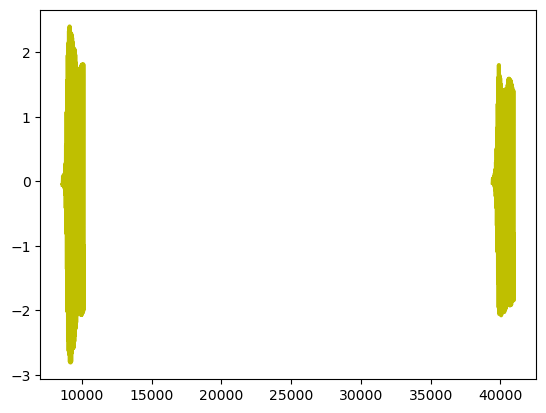

<Figure size 2000x500 with 0 Axes>

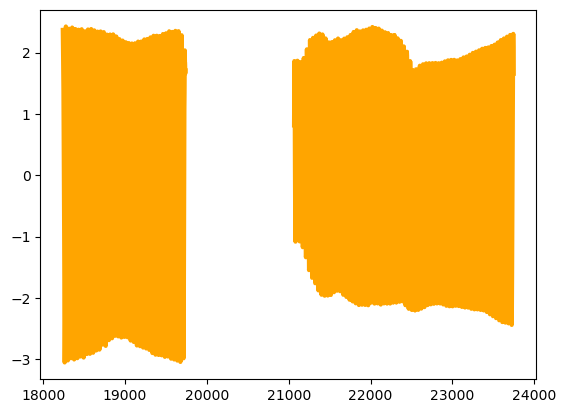

<Figure size 2000x500 with 0 Axes>

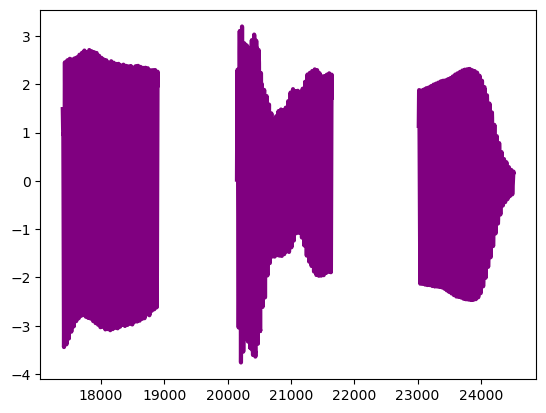

<Figure size 2000x500 with 0 Axes>

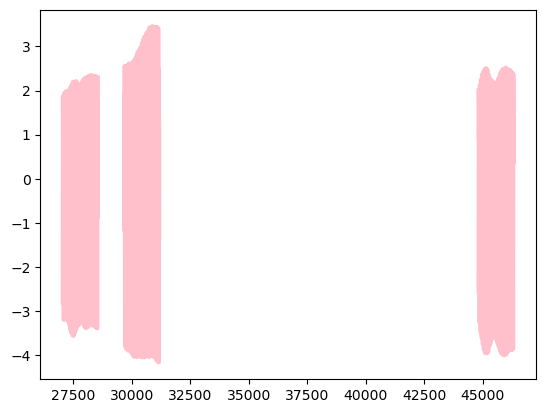

<Figure size 2000x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(tsX.values)
colors = ['r', 'g', 'k', 'b', 'y', 'orange', 'purple', 'pink', 'm', 'c'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.figure(figsize=(20,5))
    plt.show()

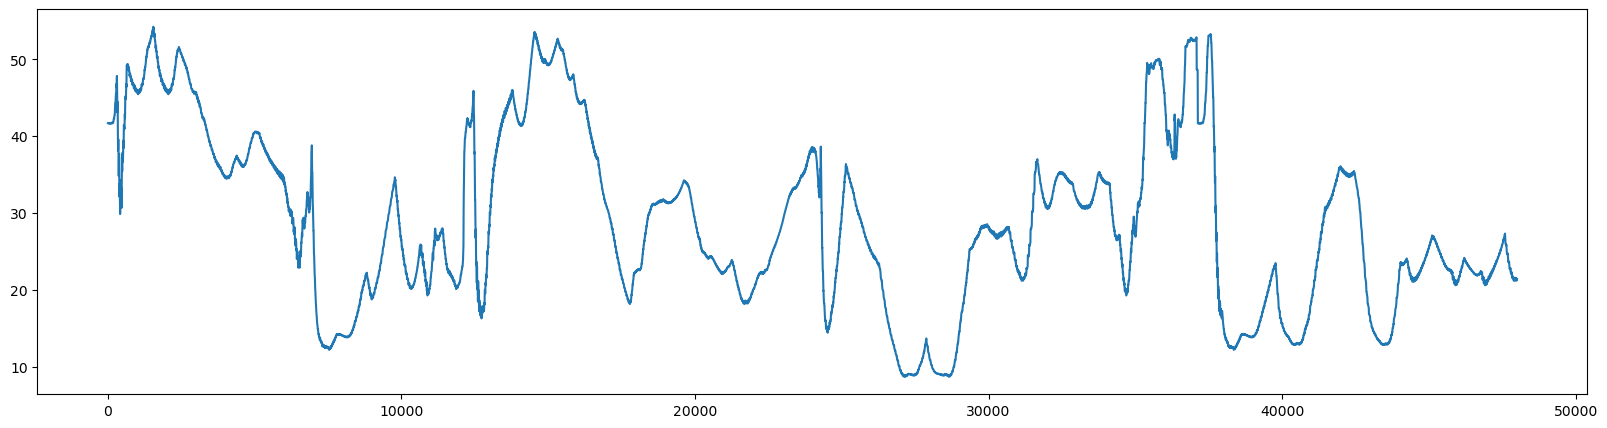

([[27123, 28642],
  [7544, 24770, 38363],
  [9111, 40423, 43455],
  [17777, 20451, 21676, 23282],
  [6475, 10885, 11913, 34689],
  [4215, 26099, 31076, 41443, 44894, 45908, 46919, 47931],
  [3201, 5455, 29645, 42454],
  [415, 1887, 12939, 14937, 16020, 19432, 32585, 36381, 39419]],
 [8.71028457226819,
  12.248978748530842,
  12.848621754712774,
  18.168137122590682,
  19.28669935846835,
  20.623230300866886,
  26.940993462249335,
  29.870140588851605])

In [ ]:
w = 2000
mp, mpi = matrixProfile.stomp(tsX.values, w)

plt.figure(figsize=(20,5))
plt.plot(mp)
plt.show()
tsX

mo, mod  = motifs.motifs(tsX.values, (mp, mpi), max_motifs=10)
mo,mod

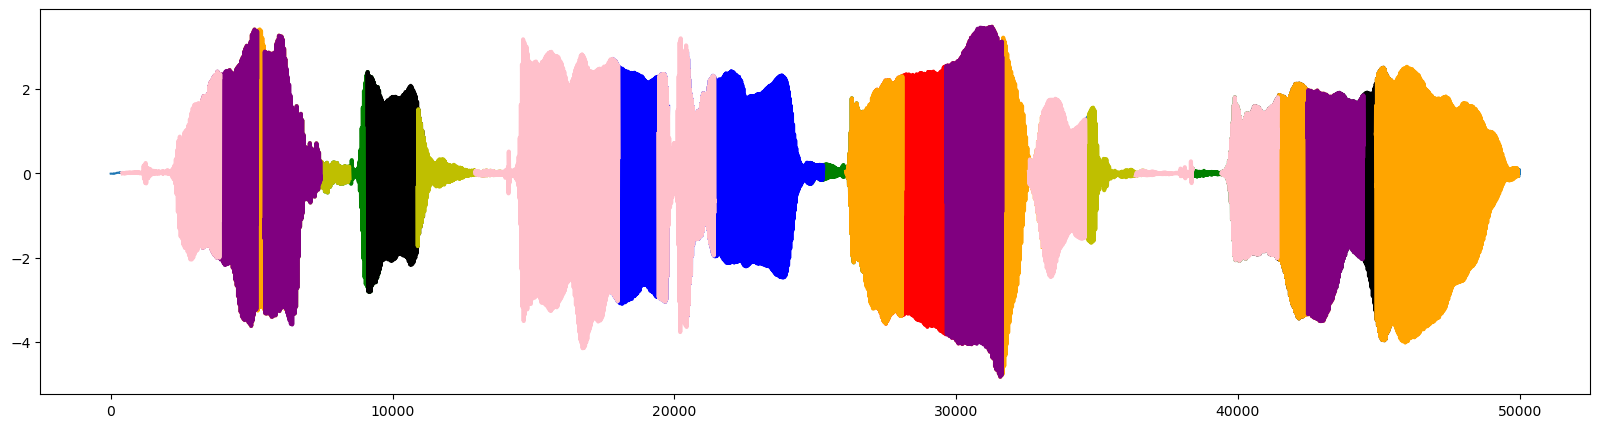

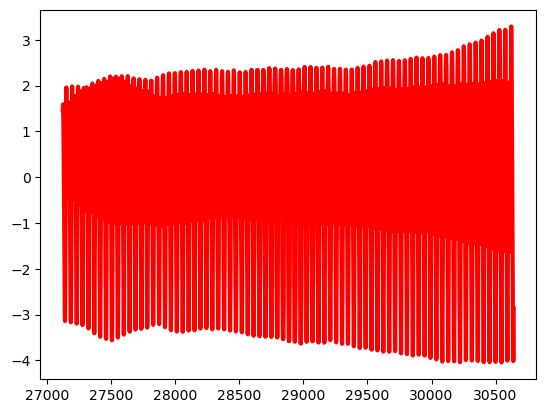

<Figure size 2000x500 with 0 Axes>

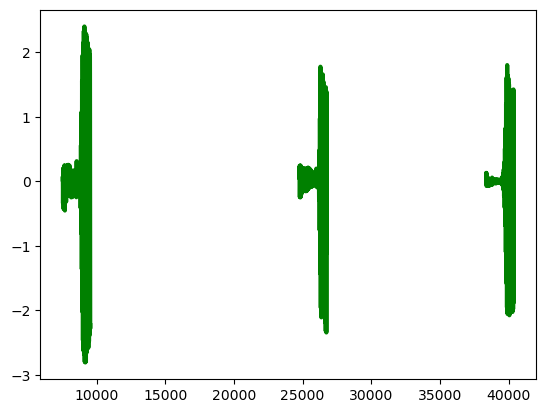

<Figure size 2000x500 with 0 Axes>

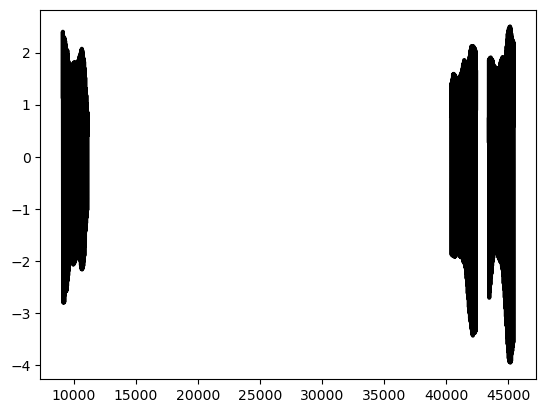

<Figure size 2000x500 with 0 Axes>

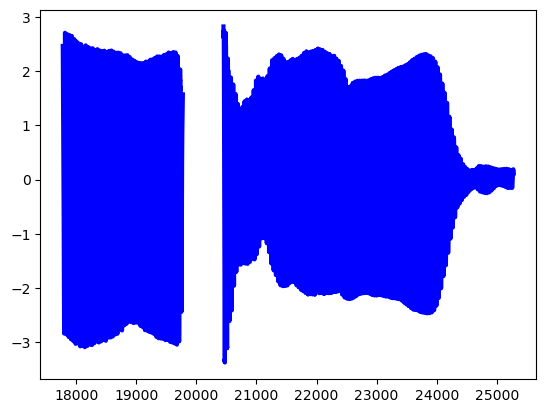

<Figure size 2000x500 with 0 Axes>

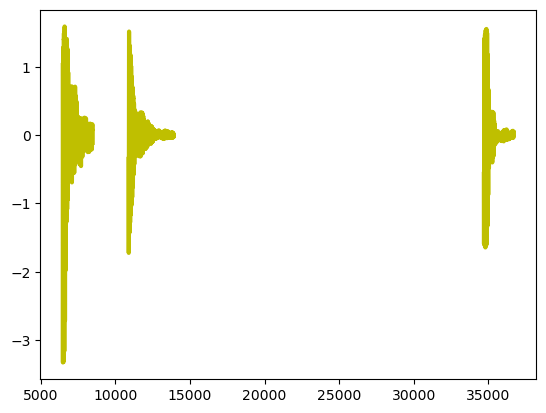

<Figure size 2000x500 with 0 Axes>

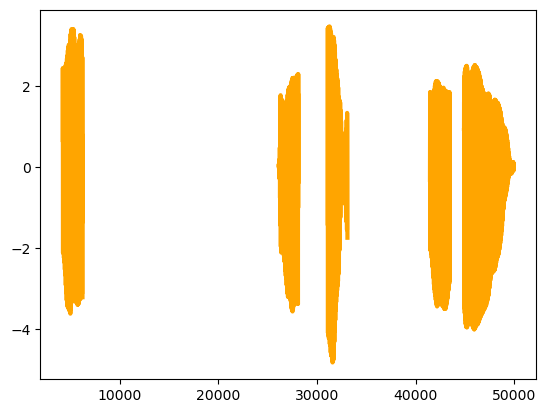

<Figure size 2000x500 with 0 Axes>

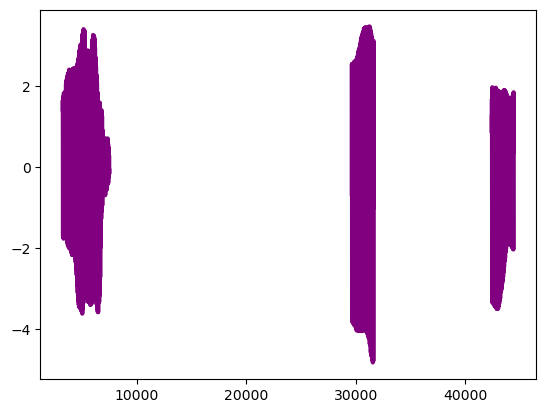

<Figure size 2000x500 with 0 Axes>

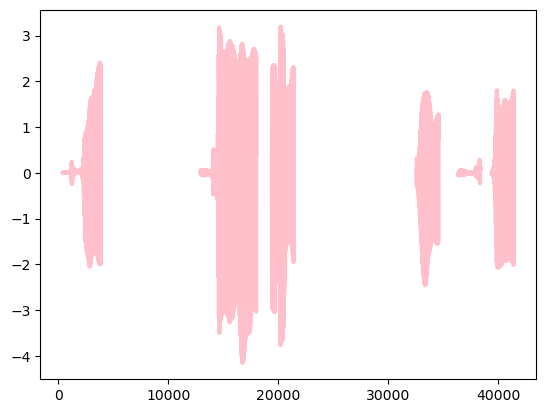

<Figure size 2000x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(tsX.values)
colors = ['r', 'g', 'k', 'b', 'y', 'orange', 'purple', 'pink', 'm', 'c'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.figure(figsize=(20,5))
    plt.show()

### W-GRANDISSIME DIMENSIONI: 5000

sono inutili perchè la finestra considerata è troppo grande e prende tutto come pattern.

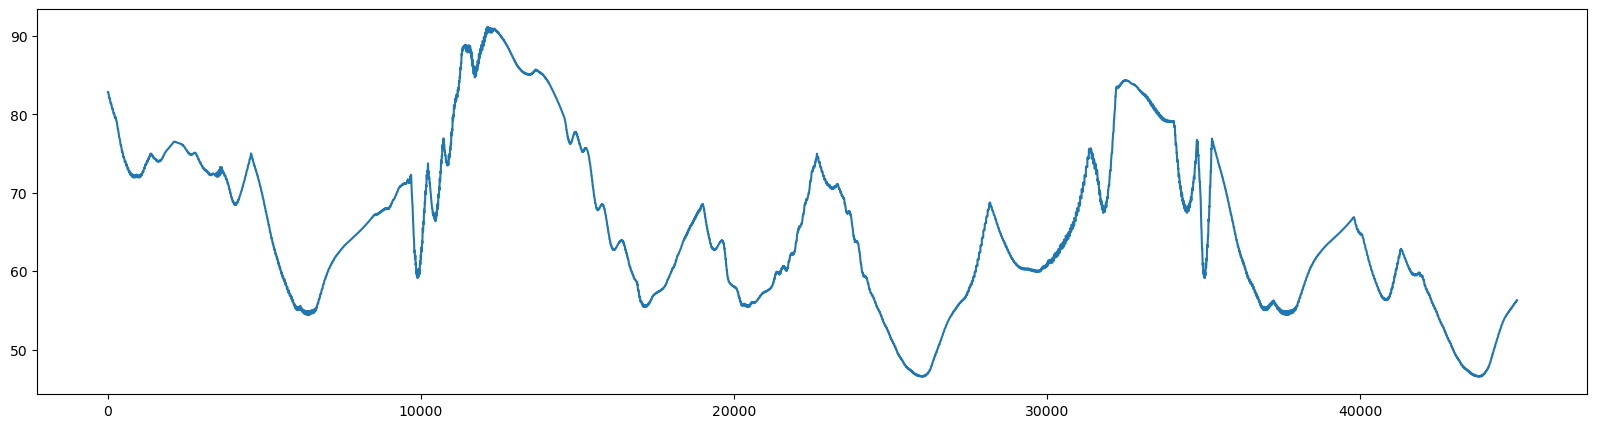

([[463,
   3957,
   6611,
   9557,
   23496,
   26027,
   28560,
   31095,
   35387,
   38058,
   41278,
   43811],
  [13944, 17118, 20445]],
 [46.52852484430778, 55.41708529141772])

In [ ]:
w = 5000
mp, mpi = matrixProfile.stomp(tsX.values, w)
mp, mpi

plt.figure(figsize=(20,5))
plt.plot(mp)
plt.show()
tsX

mo, mod  = motifs.motifs(tsX.values, (mp, mpi), max_motifs=10)
mo,mod

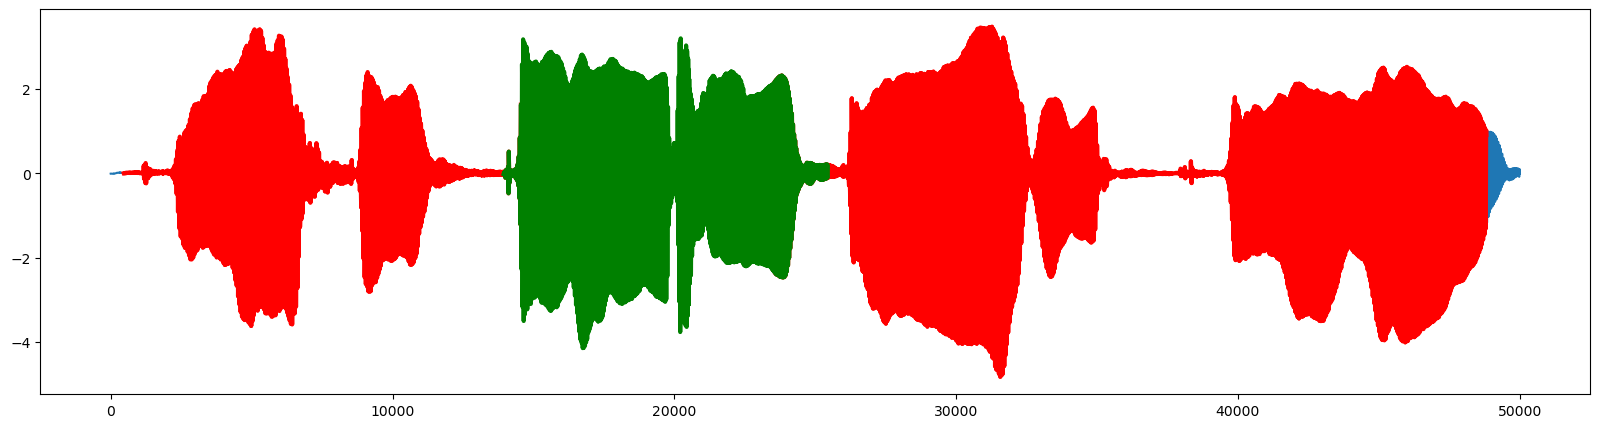

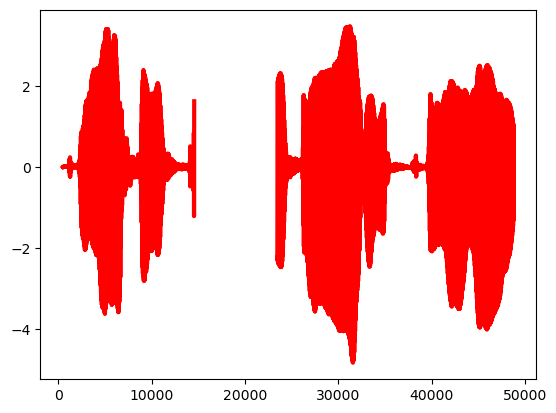

<Figure size 2000x500 with 0 Axes>

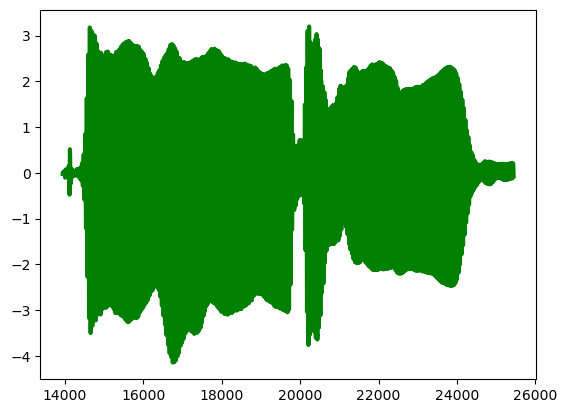

<Figure size 2000x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(tsX.values)
colors = ['r', 'g', 'k', 'b', 'y', 'orange', 'purple', 'pink', 'm', 'c'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.figure(figsize=(20,5))
    plt.show()

In [ ]:
mp, mpi

(array([41.69295523, 41.68427719, 41.67811793, ..., 21.39943046,
        21.41452014, 21.43970663]),
 array([37126., 37127., 37128., ..., 31190., 31191., 31192.]))

I motifs migliori si hanno con una finestra che va dalle piccole alle medie dimensioni, piccolissime e grandissime dimensioni non catturano niente perchè troppo piccole e non prendono niente oppure troppo grandi e prendono tutto.

Valori migliori si hanno con una finestra tra 850 e 1000, 2000

# ADESSO LO FACCIO SU QUELLO APPROSSIMATO CON SAX E DTW

#### Cluster 6, TS 811

In [ ]:
# adesso eseguo le operazioni con quello approssimato: prendo i valori per la ts 811
tsX_sax=x_train_sax[811]
tsX_sax.shape

(500,)

In [ ]:
tsX_sax

array([25, 25, 24, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 25, 25, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24,
       25, 24, 25, 24, 24, 25, 24, 24, 24, 24, 24, 24, 25, 24, 24, 24, 24,
       24, 24, 25, 24, 24, 25, 25, 25, 25, 25, 24, 25, 24, 24, 24, 25, 24,
       24, 24, 24, 24, 24, 25, 24, 24, 25, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 25, 24, 24, 25, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
       25, 25, 25, 23, 25, 25, 24, 26, 23, 25, 26, 23, 27, 23, 26, 22, 26,
       25, 23, 28, 21, 25, 27, 22, 25, 26, 22, 24, 24, 24, 25, 23, 24, 24,
       24, 24, 24, 25, 25, 25, 24, 24, 23, 24, 28, 24, 23, 26, 26, 22, 25,
       27, 22, 26, 25, 24, 25, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24,
       25, 25, 24, 24, 24, 24, 25, 23, 24, 24, 24, 24, 24, 24, 24, 24, 25,
       25, 26, 26, 24, 22, 24, 27, 26, 21, 26, 26, 22, 25, 27, 23, 23, 27,
       23, 23, 27, 22, 26, 24, 25, 25, 25, 23, 27, 24, 24, 26, 24, 22, 27,
       24, 22, 27, 24, 22

<function matplotlib.pyplot.show(close=None, block=None)>

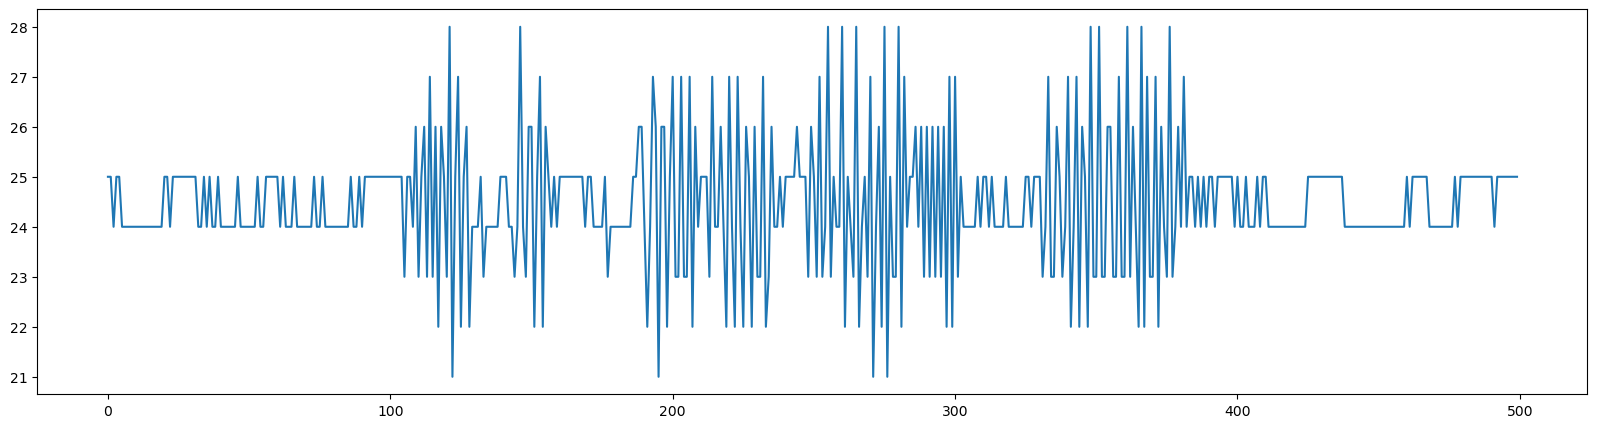

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(tsX_sax)
plt.show

In [ ]:
#anche in questo caso considero una finestra minore che va da 100 a 400 perchè prima e dopo ci sono dei valori praticamente considerati 'piatti'
tsX_sax=x_train_sax[811, 100:400] 
tsX_sax.shape

(300,)

array([25, 25, 25, 25, 25, 23, 25, 25, 24, 26, 23, 25, 26, 23, 27, 23, 26,
       22, 26, 25, 23, 28, 21, 25, 27, 22, 25, 26, 22, 24, 24, 24, 25, 23,
       24, 24, 24, 24, 24, 25, 25, 25, 24, 24, 23, 24, 28, 24, 23, 26, 26,
       22, 25, 27, 22, 26, 25, 24, 25, 24, 25, 25, 25, 25, 25, 25, 25, 25,
       25, 24, 25, 25, 24, 24, 24, 24, 25, 23, 24, 24, 24, 24, 24, 24, 24,
       24, 25, 25, 26, 26, 24, 22, 24, 27, 26, 21, 26, 26, 22, 25, 27, 23,
       23, 27, 23, 23, 27, 22, 26, 24, 25, 25, 25, 23, 27, 24, 24, 26, 24,
       22, 27, 24, 22, 27, 24, 22, 26, 25, 22, 26, 23, 23, 27, 22, 23, 26,
       24, 24, 25, 24, 25, 25, 25, 25, 26, 25, 25, 25, 23, 26, 25, 23, 27,
       23, 24, 28, 23, 25, 24, 24, 28, 22, 25, 24, 23, 28, 22, 24, 25, 23,
       27, 21, 24, 26, 22, 28, 21, 25, 23, 23, 28, 22, 27, 24, 25, 25, 26,
       24, 26, 23, 26, 23, 26, 23, 26, 23, 26, 22, 27, 22, 27, 23, 25, 24,
       24, 24, 24, 24, 25, 24, 25, 25, 24, 25, 24, 24, 24, 24, 25, 24, 24,
       24, 24, 24, 24, 25

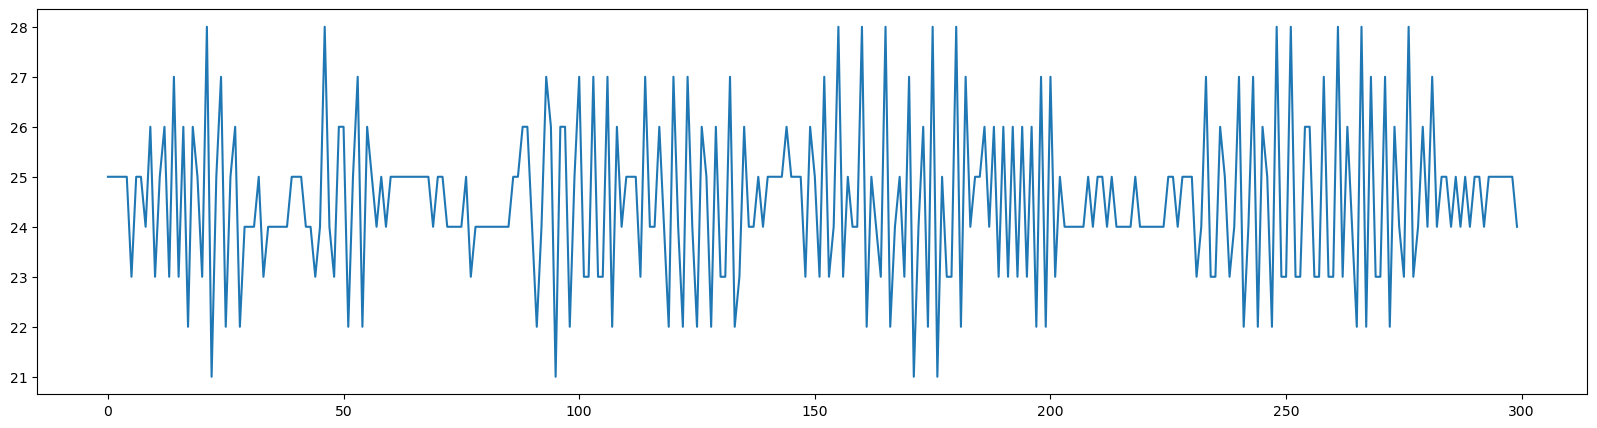

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(tsX_sax)
plt.show
tsX_sax

ho preso come window size 850, 1000 e 1500 che sono le migliori, le devo solo cambiare per il grafico

In [ ]:
# trasformo serie da numpy array a Series (formato come quello di Guidotti per semplificare i grafici)
tsX_sax = pd.Series(tsX_sax)
tsX_sax

0      25
1      25
2      25
3      25
4      25
       ..
295    25
296    25
297    25
298    25
299    24
Length: 300, dtype: int64

In [ ]:
tsX_sax.values

array([25, 25, 25, 25, 25, 23, 25, 25, 24, 26, 23, 25, 26, 23, 27, 23, 26,
       22, 26, 25, 23, 28, 21, 25, 27, 22, 25, 26, 22, 24, 24, 24, 25, 23,
       24, 24, 24, 24, 24, 25, 25, 25, 24, 24, 23, 24, 28, 24, 23, 26, 26,
       22, 25, 27, 22, 26, 25, 24, 25, 24, 25, 25, 25, 25, 25, 25, 25, 25,
       25, 24, 25, 25, 24, 24, 24, 24, 25, 23, 24, 24, 24, 24, 24, 24, 24,
       24, 25, 25, 26, 26, 24, 22, 24, 27, 26, 21, 26, 26, 22, 25, 27, 23,
       23, 27, 23, 23, 27, 22, 26, 24, 25, 25, 25, 23, 27, 24, 24, 26, 24,
       22, 27, 24, 22, 27, 24, 22, 26, 25, 22, 26, 23, 23, 27, 22, 23, 26,
       24, 24, 25, 24, 25, 25, 25, 25, 26, 25, 25, 25, 23, 26, 25, 23, 27,
       23, 24, 28, 23, 25, 24, 24, 28, 22, 25, 24, 23, 28, 22, 24, 25, 23,
       27, 21, 24, 26, 22, 28, 21, 25, 23, 23, 28, 22, 27, 24, 25, 25, 26,
       24, 26, 23, 26, 23, 26, 23, 26, 23, 26, 22, 27, 22, 27, 23, 25, 24,
       24, 24, 24, 24, 25, 24, 25, 25, 24, 25, 24, 24, 24, 24, 25, 24, 24,
       24, 24, 24, 24, 25

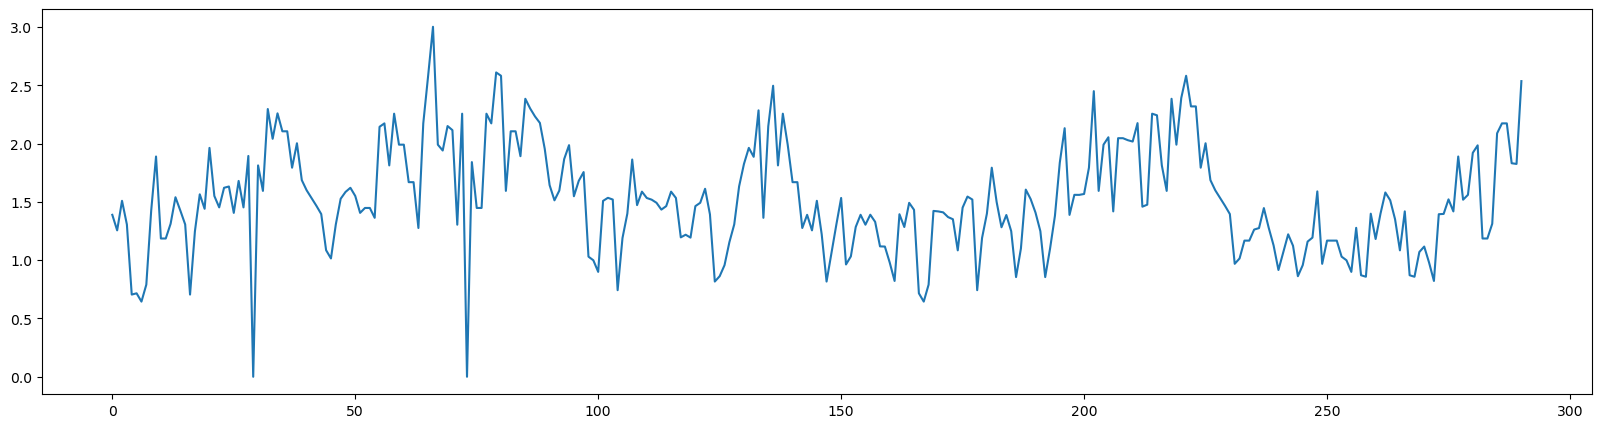

([[29, 73],
  [6, 167],
  [16, 147],
  [104, 178],
  [124, 243],
  [161, 272],
  [186, 192],
  [44, 231, 249],
  [98, 115]],
 [2.132480599880018e-06,
  0.6448372687949829,
  0.7051744974714588,
  0.742781334143556,
  0.8168706546987455,
  0.8221414653499335,
  0.8552672533334029,
  0.9690269196033703,
  1.0304416130373024])

In [ ]:
#non posso fare un confronto diretto con la finestra perchè i valori sono diversi--> non più 92000 e passa ma solamente 500

#w=12
w = 10
#w=25
#w=75
mp, mpi = matrixProfile.stomp(tsX_sax.values, w)

plt.figure(figsize=(20,5))
plt.plot(mp)
plt.show()
tsX_sax

mo, mod  = motifs.motifs(tsX_sax.values, (mp, mpi), max_motifs=10)
mo,mod

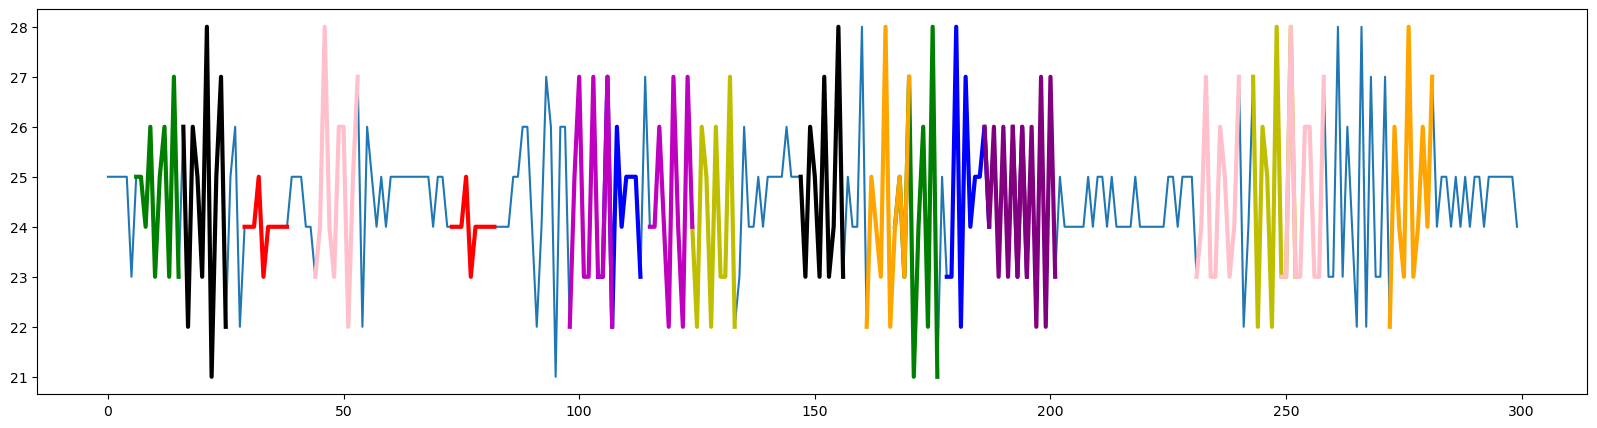

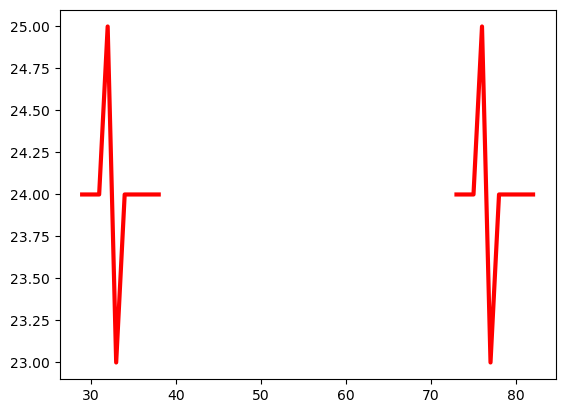

<Figure size 2000x500 with 0 Axes>

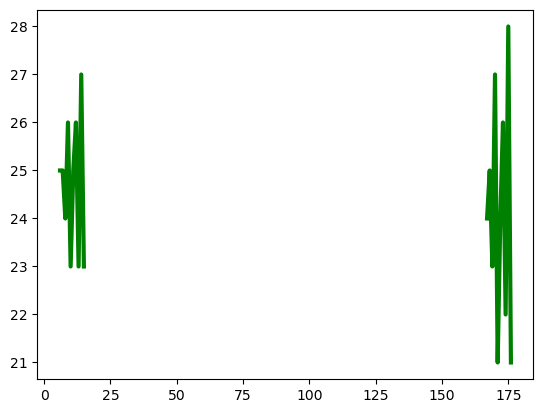

<Figure size 2000x500 with 0 Axes>

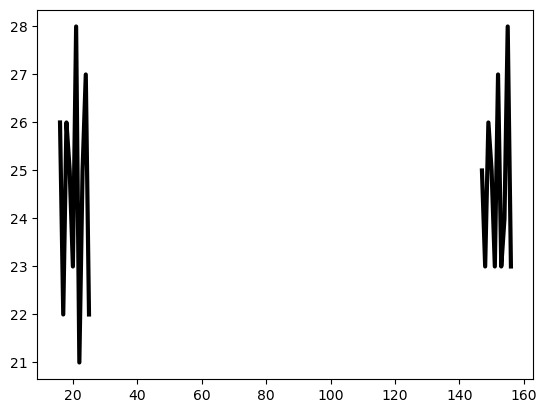

<Figure size 2000x500 with 0 Axes>

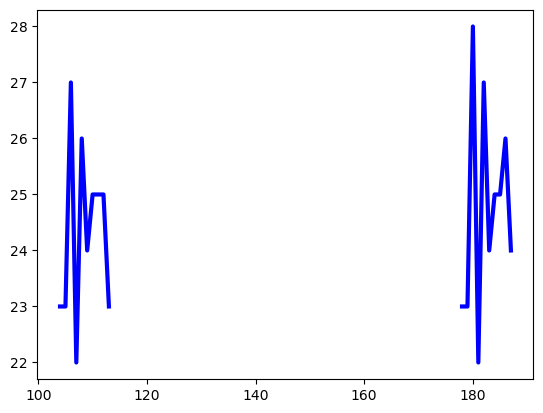

<Figure size 2000x500 with 0 Axes>

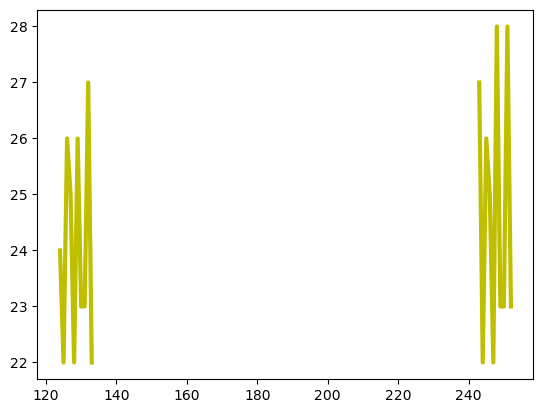

<Figure size 2000x500 with 0 Axes>

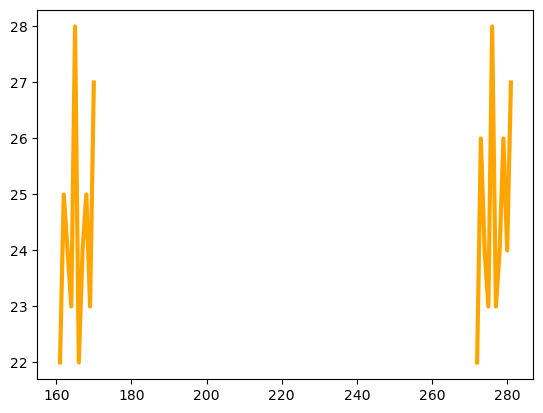

<Figure size 2000x500 with 0 Axes>

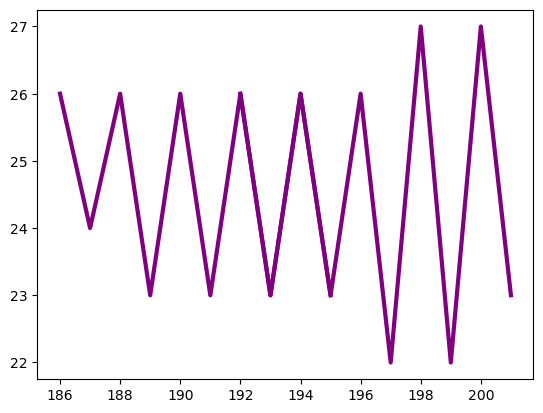

<Figure size 2000x500 with 0 Axes>

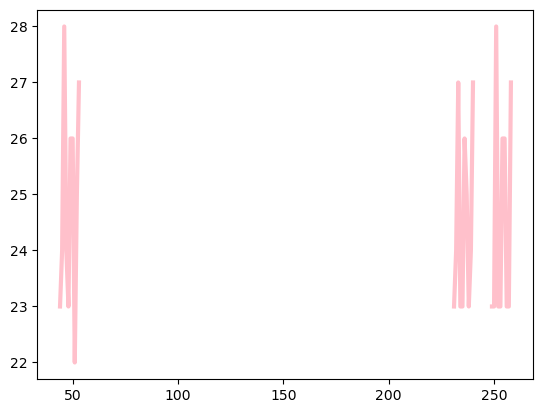

<Figure size 2000x500 with 0 Axes>

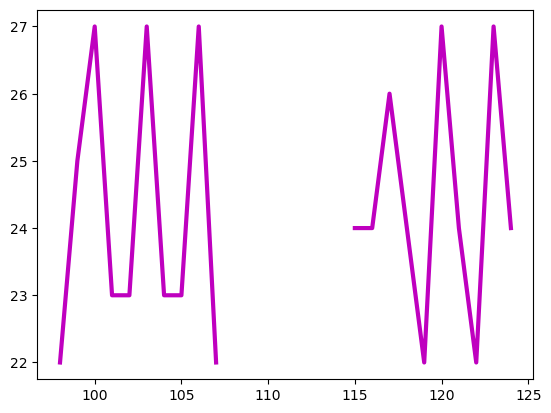

<Figure size 2000x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(tsX_sax.values)
colors = ['r', 'g', 'k', 'b', 'y', 'orange', 'purple', 'pink', 'm', 'c'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX_sax.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX_sax.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.figure(figsize=(20,5))
    plt.show()

### 

#### SNIPPET 2 - LOGARITMO - (non l'ho fatto perchè non ho ben capito cosa cambia)

Vengono applicate una differenziazione logaritmica e una media mobile prima di calcolare il profilo della matrice utilizzando STOMP sulla serie temporale trasformata. Le trasformazioni come la differenziazione logaritmica e la media mobile possono essere utilizzate per stabilizzare varianze o rendere più evidenti determinati pattern nella serie temporale.

/Users/User/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


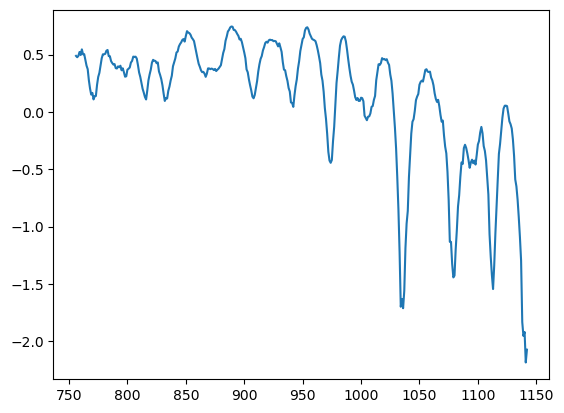

In [ ]:
window = 600
ts_log_mov_diff = pd.Series(np.log(tsX) - np.log(tsX).rolling(window, center=False).mean(), index=tsX.index)

plt.plot(ts_log_mov_diff)
plt.show()

/Users/User/anaconda3/lib/python3.10/site-packages/matrixprofile/utils.py:177: RuntimeWarning: invalid value encountered in divide
  res = 2*m*(1-(dot-m*mean*q_mean)/(m*std*q_std))
/Users/User/anaconda3/lib/python3.10/site-packages/matrixprofile/utils.py:200: RuntimeWarning: invalid value encountered in divide
  res = 2*m*(1-(dot-m*mean[index]*mean)/(m*std[index]*std))
/Users/User/anaconda3/lib/python3.10/site-packages/matrixprofile/utils.py:200: RuntimeWarning: divide by zero encountered in divide
  res = 2*m*(1-(dot-m*mean[index]*mean)/(m*std[index]*std))


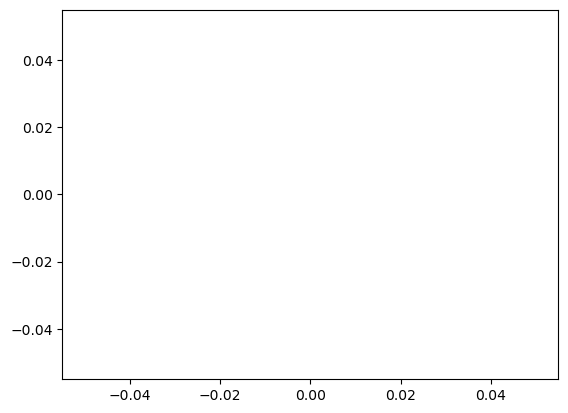

In [ ]:
w = 600
mp, mpi = matrixProfile.stomp(ts_log_mov_diff.values[11:], w)

plt.plot(mp)
plt.show()

# Motif Discovery

In [ ]:
#mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

mo, mod  = motifs.motifs(tsX.values, (mp, mpi), max_motifs=10)

Parameters
- max_motifs: stop finding new motifs once we have max_motifs
- radius: For each motif found, find neighbors that are within radius*motif_mp of the first.
- n_neighbors: number of neighbors from the first to find. If it is None, find all.
- ex_zone: minimum distance between indices for after each subsequence is identified. Defaults to m/2 where m is the subsequence length. If ex_zone = 0, only the found index is exclude, if ex_zone = 1 then if idx is found as a motif idx-1, idx, idx+1 are excluded.


Returns
The function returns a tuple (top_motifs, distances) which are lists of the same length.

- top_motifs: This is a list of the indices found for each motif. The first index is the nth motif followed by all nearest neighbors found sorted by distances.
- distances: Minimum Matrix profile value for each motif set.

In [ ]:
mo

[[23555, 23631],
 [23568, 23644],
 [23421, 23459, 23497, 23535],
 [23396, 23434, 23662],
 [23196, 23234, 23272]]

In [ ]:
mod

[0.00634288226032162,
 0.008150246968448327,
 0.00945937165436405,
 0.009789069563424617,
 0.01063575398758766]

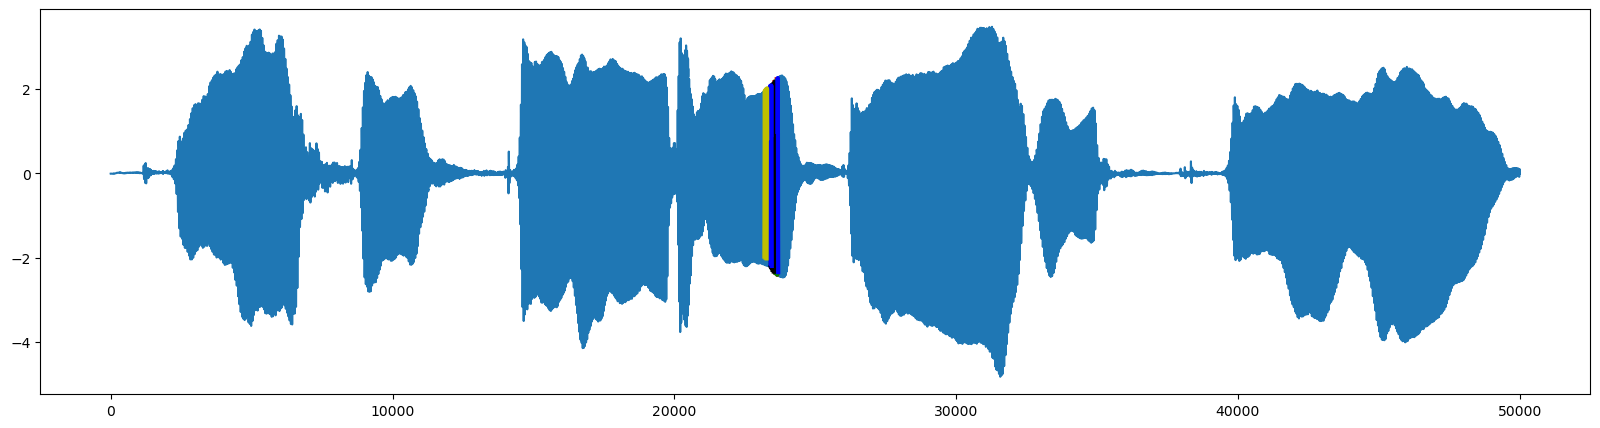

In [ ]:
plt.figure(figsize=(20,5))

plt.plot(tsX.values)

colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]

for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

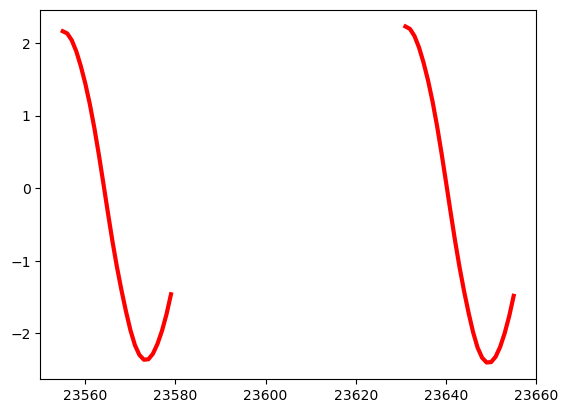

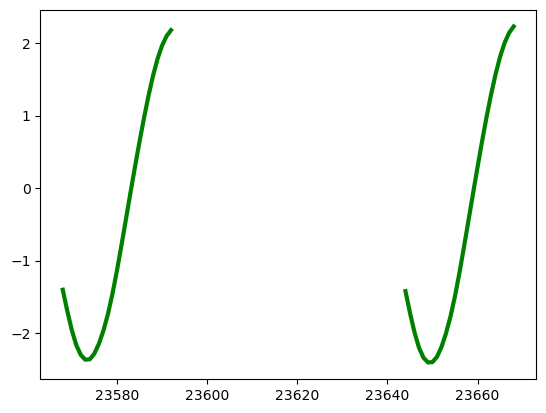

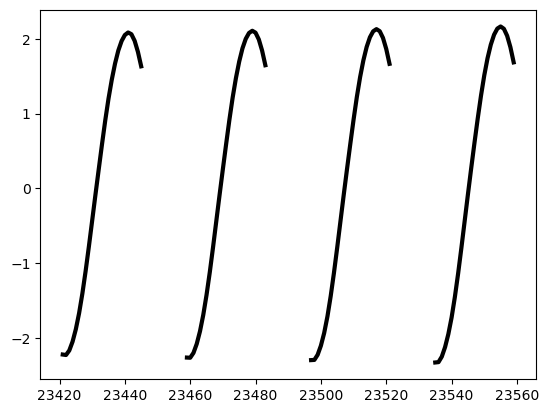

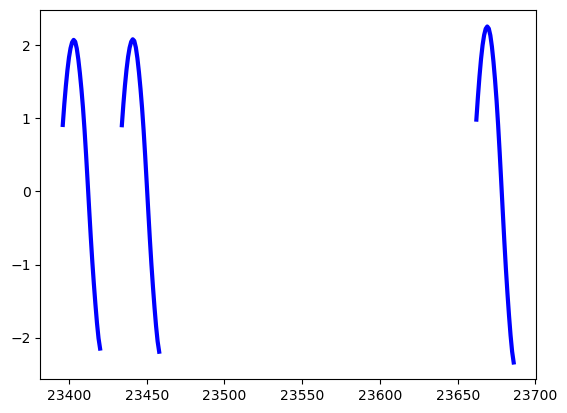

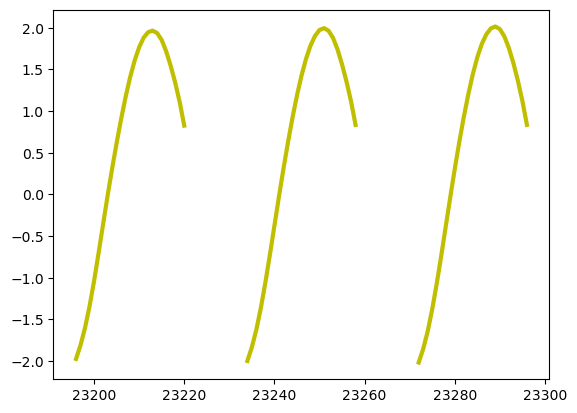

In [ ]:
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = tsX.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

# Anomaly Discovery

In [ ]:
from matrixprofile.discords import discords

Parameters  
- mp: matrix profile numpy array
- k: the number of discords to discover
- ex_zone: the number of samples to exclude and set to Inf on either side of a found discord  

Returns 
 - a list of indexes represent the discord starting locations. MaxInt indicates there were no more discords that could be found due to too many exclusions or profile being too small. Discord start indices are sorted by highest matrix profile value.

In [ ]:
anoms = discords(mp, ex_zone=3, k=5)

In [ ]:
anoms

array([ 66,  79, 221, 290, 136])

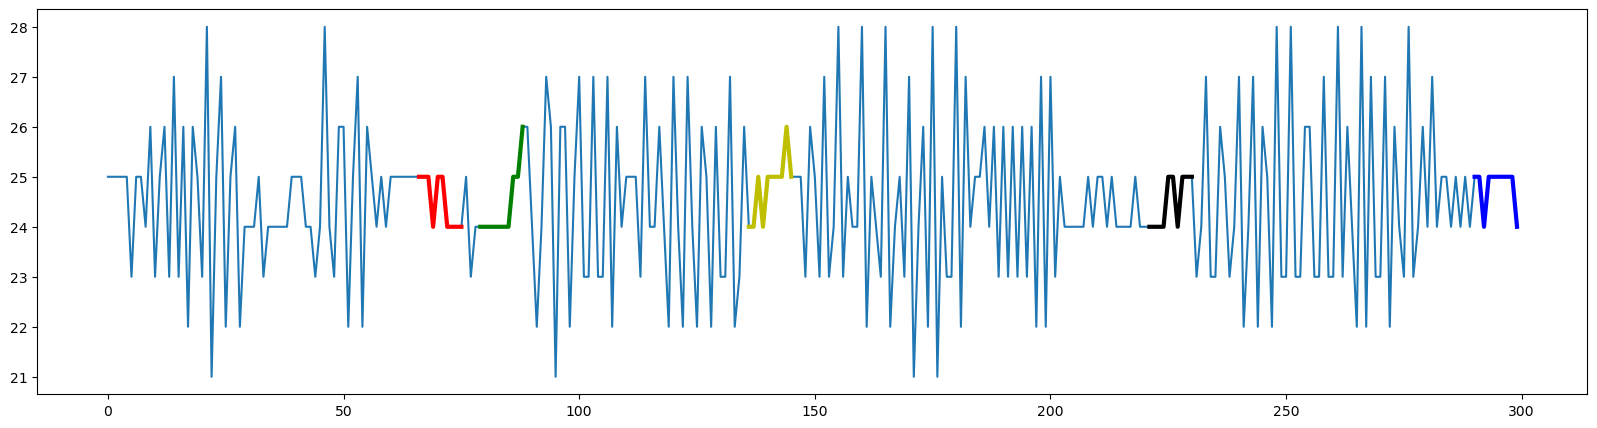

In [ ]:
plt.figure(figsize=(20, 5))

plt.plot(tsX_sax.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = tsX_sax.values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

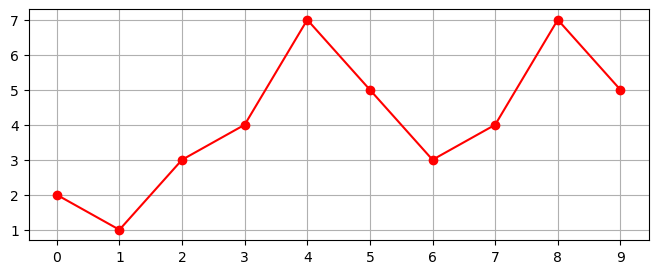

In [ ]:
plt.figure(figsize=(8, 3))
x = np.array([2,1,3,4,7,5,3,4,7,5])
plt.plot(range(len(x)), x, marker='o', color='r')
plt.xticks(range(len(x)))
plt.grid()
plt.show()

In [ ]:
w = 3
mp = np.array([np.inf] * (len(x) - w + 1))
for i in range(len(x) - w + 1):
    #print('a', x[i:i+w])
    for j in range(len(x) - w + 1):
        if i == j:
            continue
        #print('b', x[j:j+w])
        val = 0
        for k in range(w):
            val += np.abs(x[i + k] - x[j + k])
        #print(val)
        mp[i] = min(mp[i], val)
    #print('')
        

In [ ]:
mp

array([4., 4., 0., 0., 5., 4., 0., 0.])

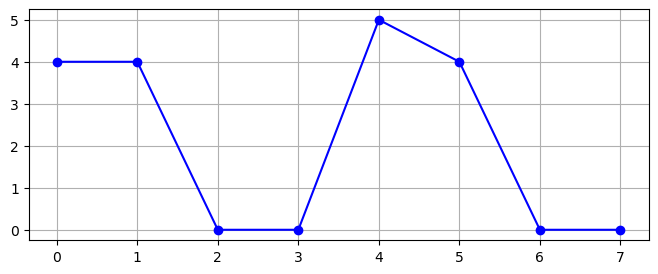

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(mp, marker='o', color='b')
plt.xticks(range(len(mp)))
plt.grid()
plt.show()

In [ ]:
mp, mpi = matrixProfile.naiveMP(tsX_sax.values, m=12)

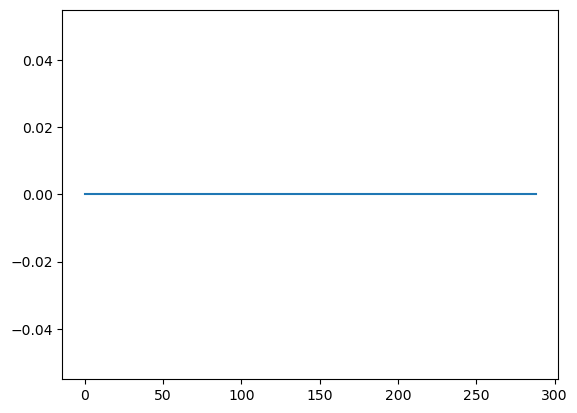

In [ ]:
plt.plot(mp)
plt.show()

In [ ]:
mp

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
mpi

array([354., 354., 355., ...,   2.,   0.,   0.])

In [ ]:
import stumpy # https://stumpy.readthedocs.io/en/latest/api.html

In [ ]:
matrix_profile = stumpy.stump(tsX_sax.values.astype(float), m=12)

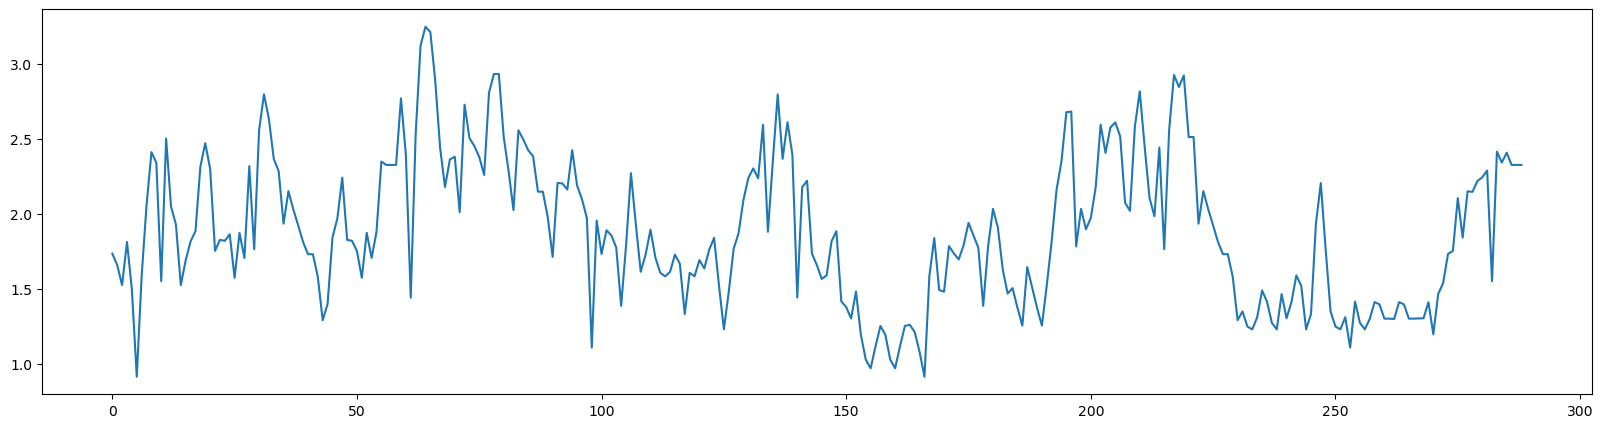

In [ ]:
mp = matrix_profile[:,0]
mpi = matrix_profile[:,1]

plt.figure(figsize=(20, 5))
plt.plot(mp)
plt.show()